# *0. preparation of environment and datasets*

## 0.1 python environment

### 0.1.1 install python dependency

In [2]:
# !pip3 install torch
# !pip3 install numpy
# !pip3 install xgboost
# !pip3 install seaborn
# !pip3 install catboost
# !pip3 install torchvision

### 0.1.2 import the library

In [3]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d
from scipy import stats
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor

## 0.2 change to the work path

In [4]:
root_file_path = "/home/extension/kaggle/IEEE-CIS_Fraud_Detection"

In [5]:
os.chdir(root_file_path)

## 0.3 unzip the files and read### 0.5 unzip the files and read

In [6]:
# !unzip train_identity.csv.zip
# !unzip train_transaction.csv.zip
# !unzip test_identity.csv.zip
# !unzip test_transaction.csv.zip

### 0.3.1 training set#### 0.5.1 training set

In [7]:
train_transcation_set = pd.read_csv("train_transaction.csv")

In [8]:
train_transcation_set.head(5)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

In [9]:
train_identity_set = pd.read_csv("train_identity.csv")

In [10]:
train_identity_set.head(5)

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

### 0.3.2 test set

In [11]:
test_transaction_set = pd.read_csv("test_transaction.csv.zip")

In [12]:
test_transaction_set.head(5)

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  ...  V330  V331  V332  V333 V334 V335  \
0  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
1  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
2  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
3  150.0        visa  166.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
4  150.0  mastercard  117.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   

   V336  V337  V338  V339  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN  

[5 rows x 393 columns]

In [13]:
test_identity_set = pd.read_csv("test_identity.csv.zip")

In [14]:
test_identity_set.head(5)

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
4        3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   

   id_09  ...                    id_31  id_32     id_33           id_34  \
0    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   
1    0.0  ...  chrome 67.0 for android   24.0  1280x720  match_status:2   
2    NaN  ...       ie 11.0 for tablet    NaN       NaN             NaN   
3    0.0  ...  chrome 67.0 for android    NaN       NaN             NaN   
4    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   

   id_35 id_36 id_37  id_38  DeviceType                   DeviceInfo  
0      F     F     T      F      mobile  MYA-L13 Build/HUAWEIMYA-L13  
1      T     F     T      T      mobile         LGLS676 Build/MXB48T  
2      F     T     T      F     desktop                  Trident/7.0  
3      F     F     T      F      mobile  MYA-L13 Build/HUAWEIMYA-L13  
4      F     F     T      F      mobile         SM-G9650 Build/R16NW  

[5 rows x 41 columns]

# *1. data preprocessing*

## 1.0. data previewing

In [15]:
train_transcation_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [16]:
train_identity_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [17]:
train_transcation_set.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

## 1.1 merge sets

### 1.1.1 training set

In [18]:
df_train = pd.merge(train_transcation_set, train_identity_set, how="left", on=["TransactionID"])

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [20]:
total_data_entry, total_column = df_train.shape

### 1.1.2 testing set

In [21]:
df_test = pd.merge(test_transaction_set, test_identity_set, how="left", on=["TransactionID"])

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 1.6+ GB


## 1.2 data analyzation

### 1.2.1 nan value

#### 1.2.1.0 preparation

In [23]:
print(type(df_train["DeviceType"].dtype))

<class 'numpy.dtype'>


In [27]:
null_df = df_train.isnull()

#### 1.2.1.1 proportion of nan value by columns

In [28]:
delete_nan_threshold = 0.4

In [29]:
np.sum(null_df == True) / total_data_entry

TransactionID     0.000000
isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
card1             0.000000
card2             0.015127
card3             0.002650
card4             0.002670
card5             0.007212
card6             0.002660
addr1             0.111264
addr2             0.111264
dist1             0.596524
dist2             0.936284
P_emaildomain     0.159949
R_emaildomain     0.767516
C1                0.000000
C2                0.000000
C3                0.000000
C4                0.000000
C5                0.000000
C6                0.000000
C7                0.000000
C8                0.000000
C9                0.000000
C10               0.000000
C11               0.000000
C12               0.000000
C13               0.000000
                    ...   
id_11             0.761273
id_12             0.755761
id_13             0.784401
id_14             0.864456
id_15             0.761261
id_16             0.780980
i

In [30]:
usage_column = []

Column Name is TransactionID:


No handles with labels found to put in legend.


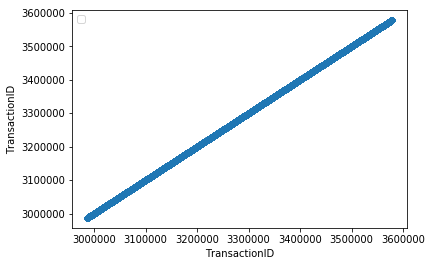

Missing data proportion is 0.0
-------------------------------------
Column Name is isFraud:


No handles with labels found to put in legend.


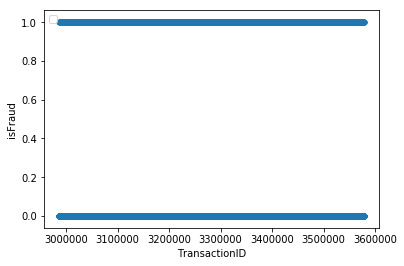

Missing data proportion is 0.0
-------------------------------------
Column Name is TransactionDT:


No handles with labels found to put in legend.


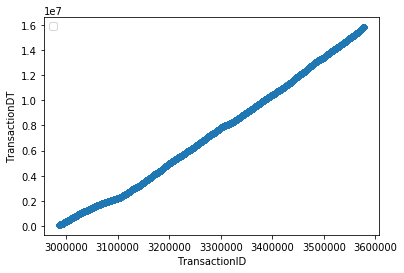

Missing data proportion is 0.0
-------------------------------------
Column Name is TransactionAmt:


No handles with labels found to put in legend.


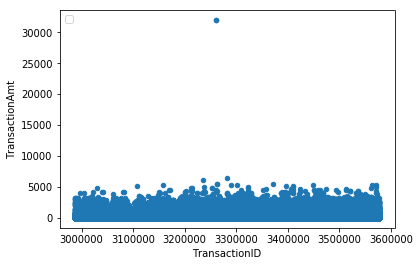

Missing data proportion is 0.0
-------------------------------------
Column Name is ProductCD:
['W' 'H' 'C' 'S' 'R']
[439670, 33024, 68519, 11628, 37699]


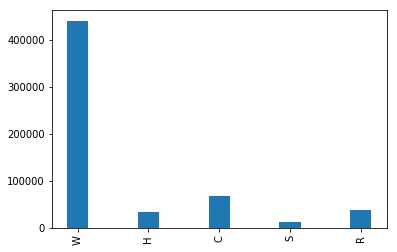

Missing data proportion is 0.0
-------------------------------------
Column Name is card1:


No handles with labels found to put in legend.


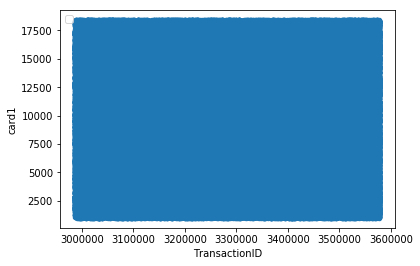

Missing data proportion is 0.0
-------------------------------------
Column Name is card2:


No handles with labels found to put in legend.


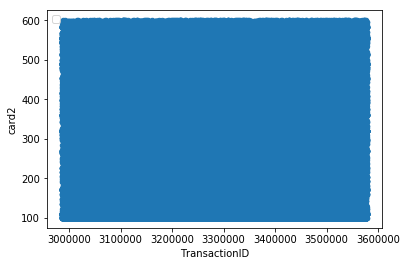

Missing data proportion is 0.015126833068039414
-------------------------------------
Column Name is card3:


No handles with labels found to put in legend.


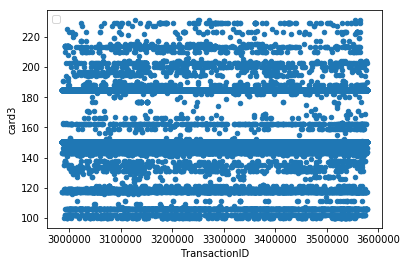

Missing data proportion is 0.002650116842212169
-------------------------------------
Column Name is card4:
['discover' 'mastercard' 'visa' 'american express']
[6651, 189217, 384767, 8328]


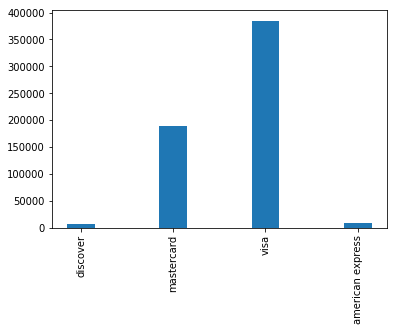

Missing data proportion is 0.0026704372269448218
-------------------------------------
Column Name is card5:


No handles with labels found to put in legend.


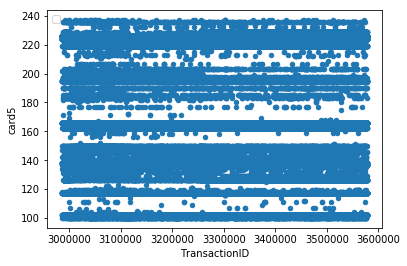

Missing data proportion is 0.007212043214684827
-------------------------------------
Column Name is card6:
['credit' 'debit' 'debit or credit' 'charge card']
[148986, 439938, 30, 15]


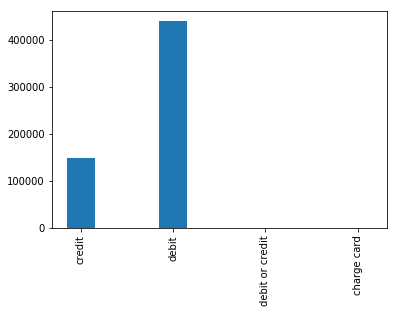

Missing data proportion is 0.0026602770345784954
-------------------------------------
Column Name is addr1:


No handles with labels found to put in legend.


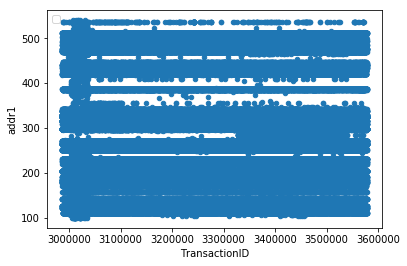

Missing data proportion is 0.11126426660344768
-------------------------------------
Column Name is addr2:


No handles with labels found to put in legend.


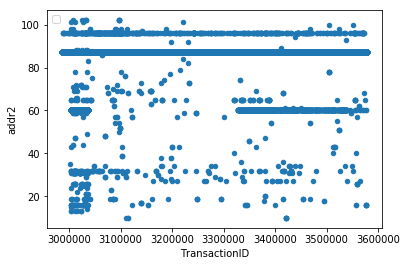

Missing data proportion is 0.11126426660344768
-------------------------------------
Column Name is dist1:


No handles with labels found to put in legend.


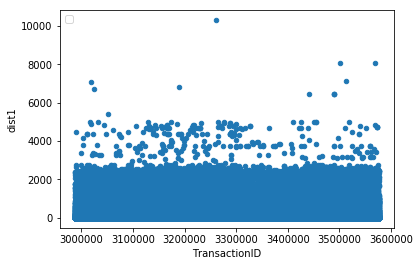

Missing data proportion is 0.596523520845328
-------------------------------------
Column Name is dist2:


No handles with labels found to put in legend.


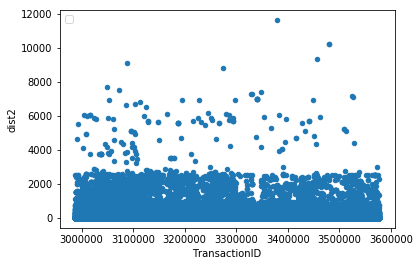

Missing data proportion is 0.9362837403054831
-------------------------------------
Column Name is P_emaildomain:
['gmail.com' 'outlook.com' 'yahoo.com' 'mail.com' 'anonymous.com'
 'hotmail.com' 'verizon.net' 'aol.com' 'me.com' 'comcast.net'
 'optonline.net' 'cox.net' 'charter.net' 'rocketmail.com' 'prodigy.net.mx'
 'embarqmail.com' 'icloud.com' 'live.com.mx' 'gmail' 'live.com' 'att.net'
 'juno.com' 'ymail.com' 'sbcglobal.net' 'bellsouth.net' 'msn.com' 'q.com'
 'yahoo.com.mx' 'centurylink.net' 'servicios-ta.com' 'earthlink.net'
 'hotmail.es' 'cfl.rr.com' 'roadrunner.com' 'netzero.net' 'gmx.de'
 'suddenlink.net' 'frontiernet.net' 'windstream.net' 'frontier.com'
 'outlook.es' 'mac.com' 'netzero.com' 'aim.com' 'web.de' 'twc.com'
 'cableone.net' 'yahoo.fr' 'yahoo.de' 'yahoo.es' 'sc.rr.com' 'ptd.net'
 'live.fr' 'yahoo.co.uk' 'hotmail.fr' 'hotmail.de' 'hotmail.co.uk'
 'protonmail.com' 'yahoo.co.jp']
[228355, 5096, 100934, 559, 36998, 45250, 2705, 28289, 1522, 7888, 1011, 1393, 816, 664, 207,

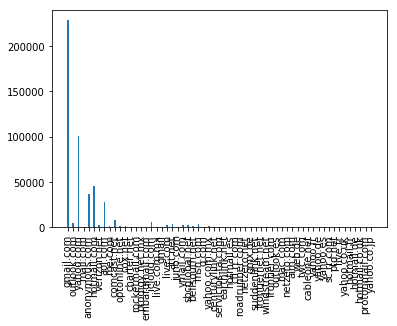

Missing data proportion is 0.15994852169201068
-------------------------------------
Column Name is R_emaildomain:
['gmail.com' 'hotmail.com' 'outlook.com' 'anonymous.com' 'charter.net'
 'prodigy.net.mx' 'comcast.net' 'live.com.mx' 'icloud.com' 'yahoo.com'
 'aol.com' 'juno.com' 'att.net' 'verizon.net' 'yahoo.com.mx'
 'bellsouth.net' 'servicios-ta.com' 'ymail.com' 'hotmail.es' 'msn.com'
 'optonline.net' 'live.com' 'gmx.de' 'aim.com' 'mail.com' 'me.com'
 'outlook.es' 'cox.net' 'earthlink.net' 'embarqmail.com' 'web.de'
 'sbcglobal.net' 'scranton.edu' 'mac.com' 'twc.com' 'roadrunner.com'
 'yahoo.fr' 'yahoo.de' 'yahoo.es' 'frontiernet.net' 'gmail' 'live.fr'
 'q.com' 'yahoo.co.uk' 'windstream.net' 'suddenlink.net' 'hotmail.fr'
 'ptd.net' 'hotmail.de' 'frontier.com' 'cfl.rr.com' 'hotmail.co.uk'
 'netzero.com' 'netzero.net' 'yahoo.co.jp' 'rocketmail.com'
 'centurylink.net' 'protonmail.com' 'cableone.net' 'sc.rr.com']
[57147, 27509, 2507, 20529, 127, 207, 1812, 754, 1398, 11842, 3701, 53, 430, 

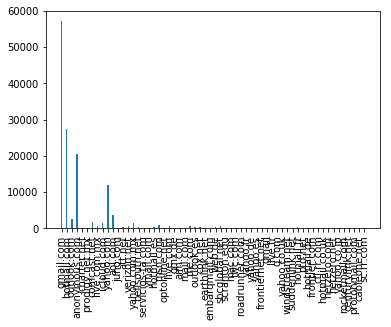

Missing data proportion is 0.7675161716395164
-------------------------------------
Column Name is C1:


No handles with labels found to put in legend.


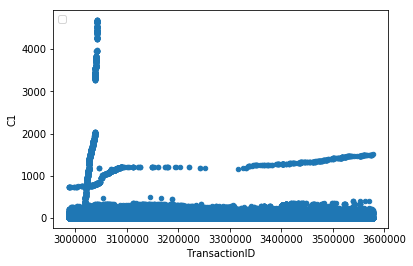

Missing data proportion is 0.0
-------------------------------------
Column Name is C2:


No handles with labels found to put in legend.


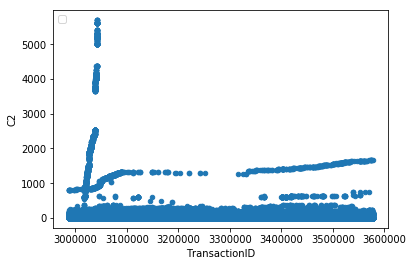

Missing data proportion is 0.0
-------------------------------------
Column Name is C3:


No handles with labels found to put in legend.


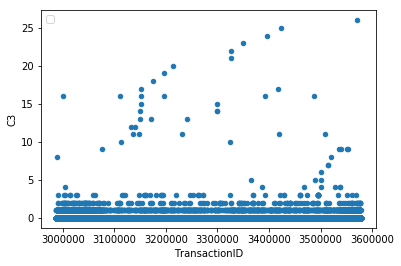

Missing data proportion is 0.0
-------------------------------------
Column Name is C4:


No handles with labels found to put in legend.


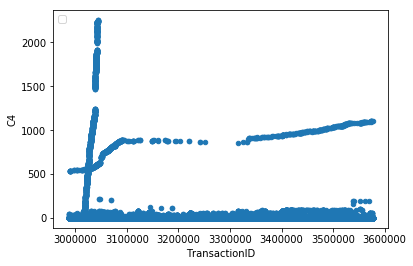

Missing data proportion is 0.0
-------------------------------------
Column Name is C5:


No handles with labels found to put in legend.


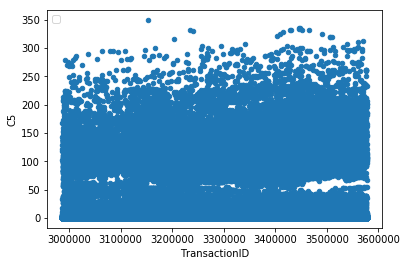

Missing data proportion is 0.0
-------------------------------------
Column Name is C6:


No handles with labels found to put in legend.


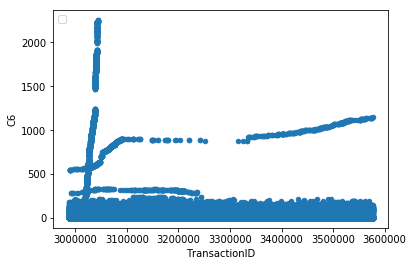

Missing data proportion is 0.0
-------------------------------------
Column Name is C7:


No handles with labels found to put in legend.


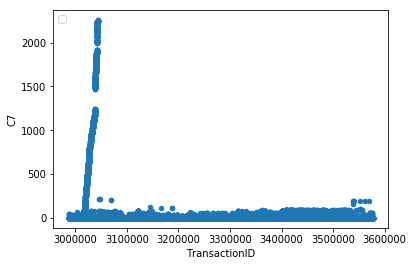

Missing data proportion is 0.0
-------------------------------------
Column Name is C8:


No handles with labels found to put in legend.


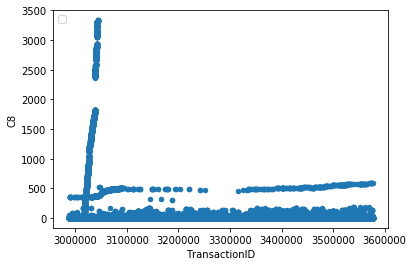

Missing data proportion is 0.0
-------------------------------------
Column Name is C9:


No handles with labels found to put in legend.


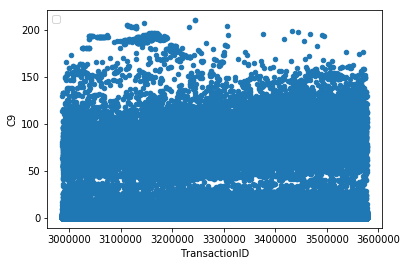

Missing data proportion is 0.0
-------------------------------------
Column Name is C10:


No handles with labels found to put in legend.


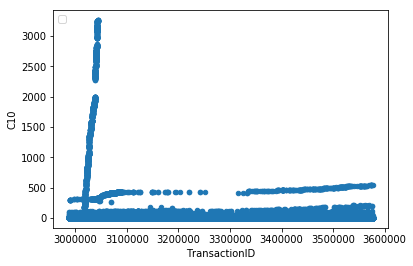

Missing data proportion is 0.0
-------------------------------------
Column Name is C11:


No handles with labels found to put in legend.


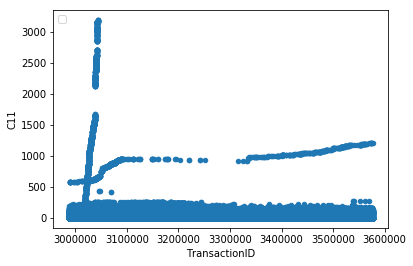

Missing data proportion is 0.0
-------------------------------------
Column Name is C12:


No handles with labels found to put in legend.


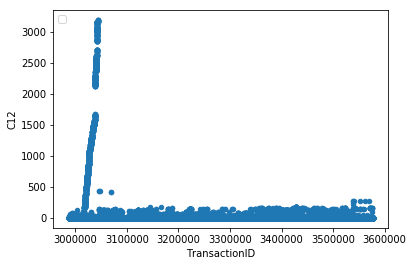

Missing data proportion is 0.0
-------------------------------------
Column Name is C13:


No handles with labels found to put in legend.


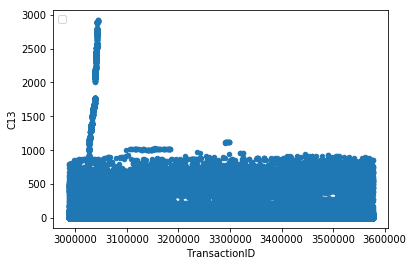

Missing data proportion is 0.0
-------------------------------------
Column Name is C14:


No handles with labels found to put in legend.


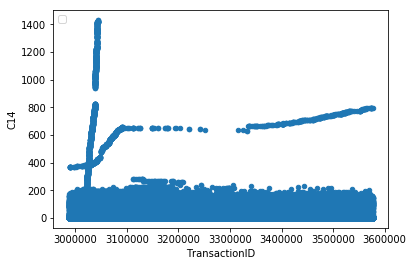

Missing data proportion is 0.0
-------------------------------------
Column Name is D1:


No handles with labels found to put in legend.


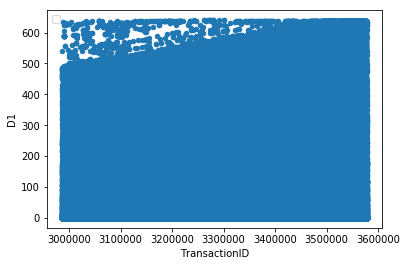

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is D2:


No handles with labels found to put in legend.


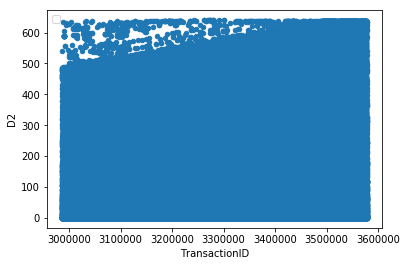

Missing data proportion is 0.47549192264706874
-------------------------------------
Column Name is D3:


No handles with labels found to put in legend.


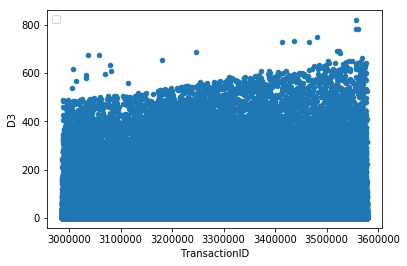

Missing data proportion is 0.44514850814508755
-------------------------------------
Column Name is D4:


No handles with labels found to put in legend.


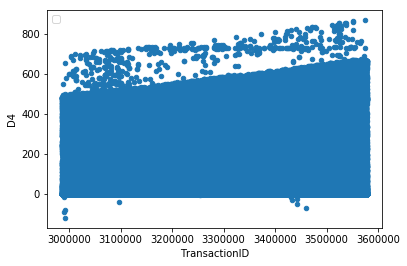

Missing data proportion is 0.2860466691502692
-------------------------------------
Column Name is D5:


No handles with labels found to put in legend.


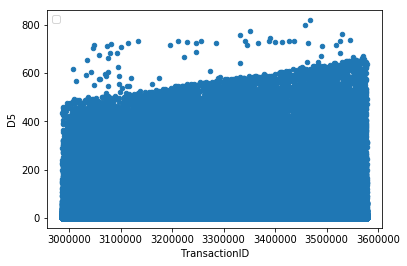

Missing data proportion is 0.5246740271615808
-------------------------------------
Column Name is D6:


No handles with labels found to put in legend.


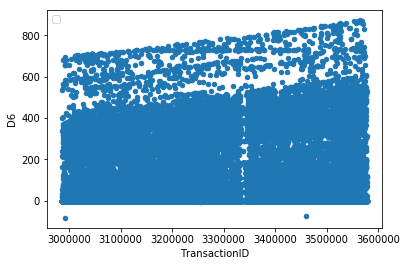

Missing data proportion is 0.8760676668811596
-------------------------------------
Column Name is D7:


No handles with labels found to put in legend.


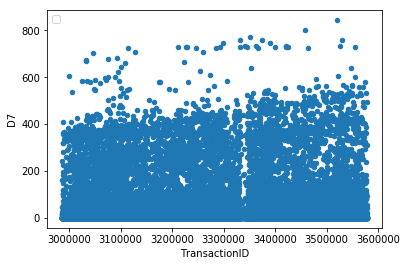

Missing data proportion is 0.9340992989467267
-------------------------------------
Column Name is D8:


No handles with labels found to put in legend.


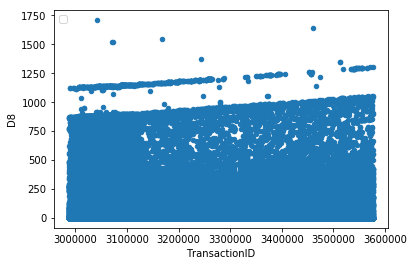

Missing data proportion is 0.8731229044603245
-------------------------------------
Column Name is D9:


No handles with labels found to put in legend.


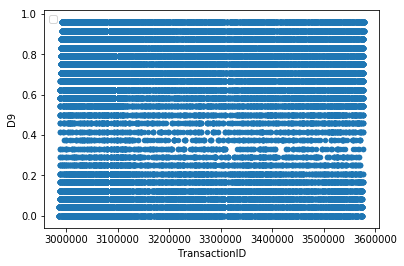

Missing data proportion is 0.8731229044603245
-------------------------------------
Column Name is D10:


No handles with labels found to put in legend.


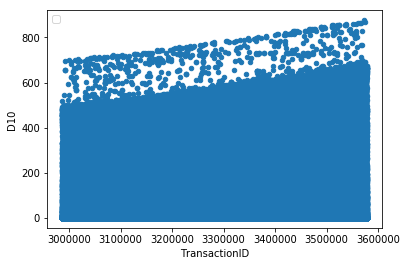

Missing data proportion is 0.12873302401192133
-------------------------------------
Column Name is D11:


No handles with labels found to put in legend.


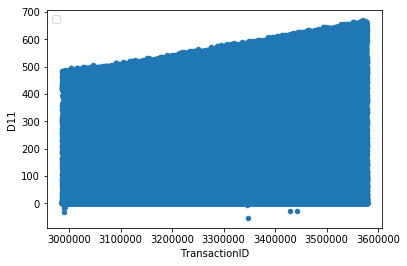

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is D12:


No handles with labels found to put in legend.


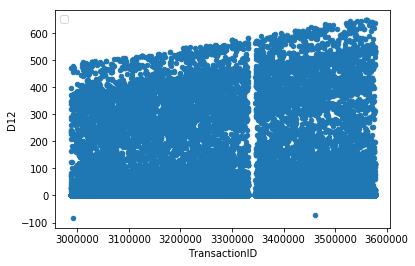

Missing data proportion is 0.8904104717715988
-------------------------------------
Column Name is D13:


No handles with labels found to put in legend.


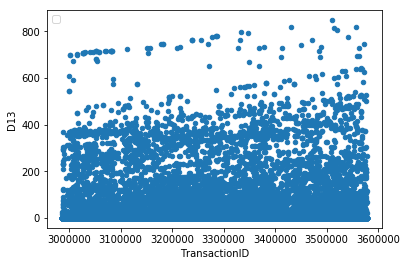

Missing data proportion is 0.8950926270870728
-------------------------------------
Column Name is D14:


No handles with labels found to put in legend.


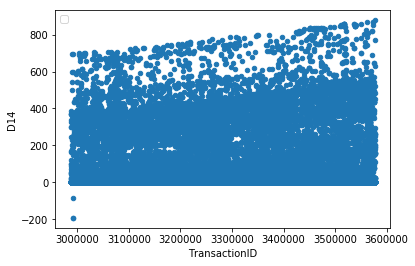

Missing data proportion is 0.8946946862193924
-------------------------------------
Column Name is D15:


No handles with labels found to put in legend.


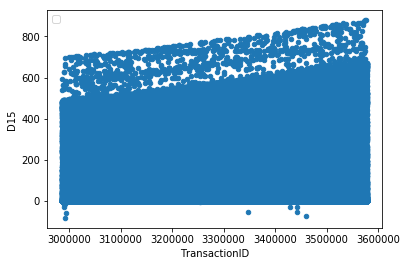

Missing data proportion is 0.1509008703898127
-------------------------------------
Column Name is M1:
['T' 'F']
[319415, 25]


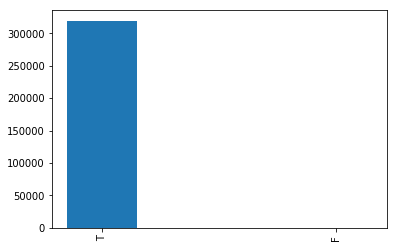

Missing data proportion is 0.4590713584177194
-------------------------------------
Column Name is M2:
['T' 'F']
[285468, 33972]


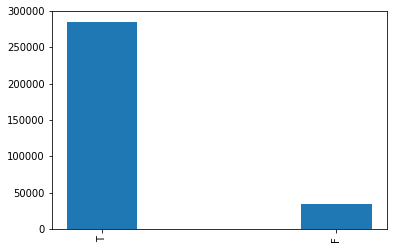

Missing data proportion is 0.4590713584177194
-------------------------------------
Column Name is M3:
['T' 'F']
[251731, 67709]


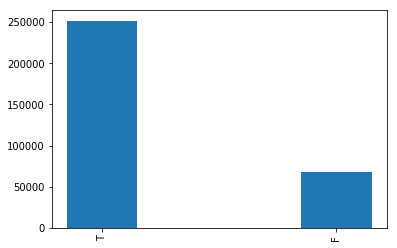

Missing data proportion is 0.4590713584177194
-------------------------------------
Column Name is M4:
['M2' 'M0' 'M1']
[59865, 196405, 52826]


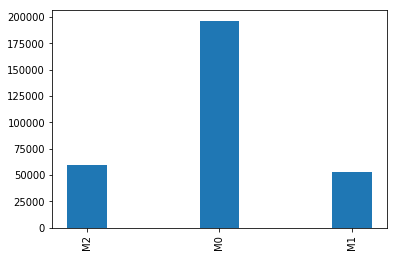

Missing data proportion is 0.47658753005723575
-------------------------------------
Column Name is M5:
['F' 'T']
[132491, 107567]


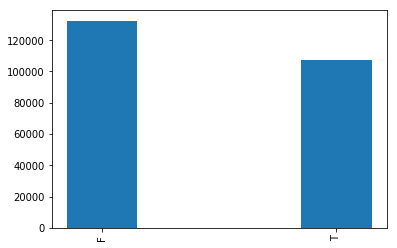

Missing data proportion is 0.5934940901547736
-------------------------------------
Column Name is M6:
['T' 'F']
[193324, 227856]


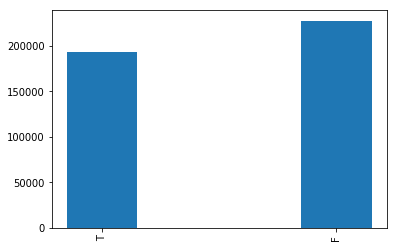

Missing data proportion is 0.2867883631930098
-------------------------------------
Column Name is M7:
['F' 'T']
[211374, 32901]


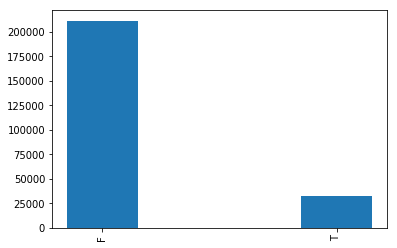

Missing data proportion is 0.586353168286653
-------------------------------------
Column Name is M8:
['F' 'T']
[155251, 89037]


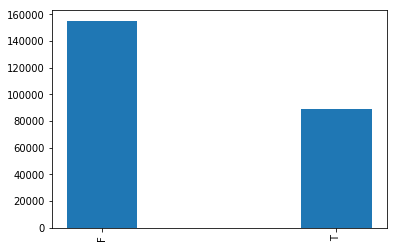

Missing data proportion is 0.586331154536526
-------------------------------------
Column Name is M9:
['F' 'T']
[38632, 205656]


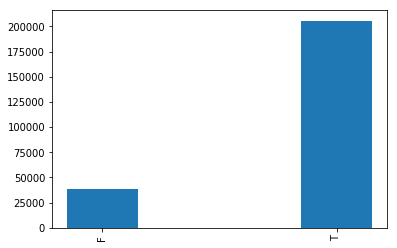

Missing data proportion is 0.586331154536526
-------------------------------------
Column Name is V1:


No handles with labels found to put in legend.


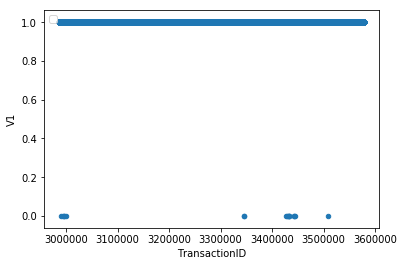

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is V2:


No handles with labels found to put in legend.


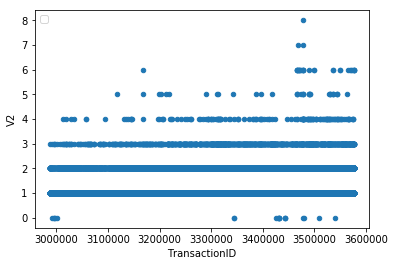

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is V3:


No handles with labels found to put in legend.


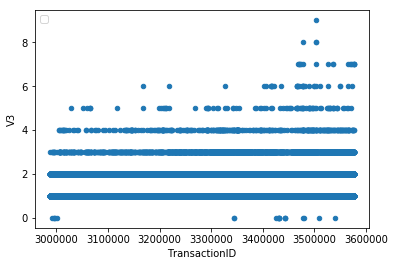

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is V4:


No handles with labels found to put in legend.


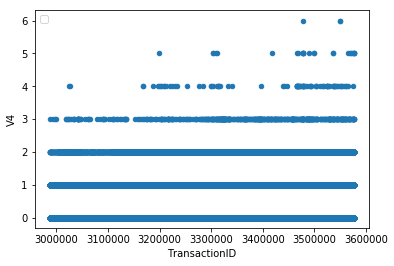

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is V5:


No handles with labels found to put in legend.


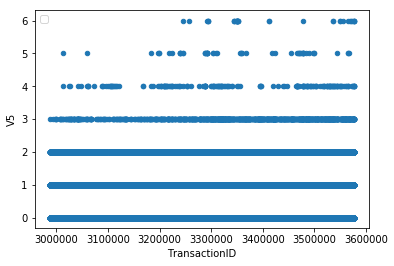

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is V6:


No handles with labels found to put in legend.


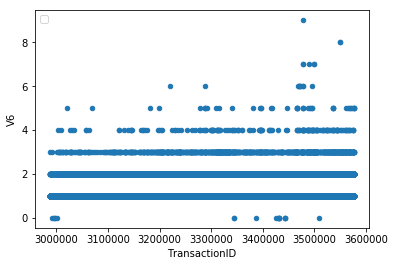

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is V7:


No handles with labels found to put in legend.


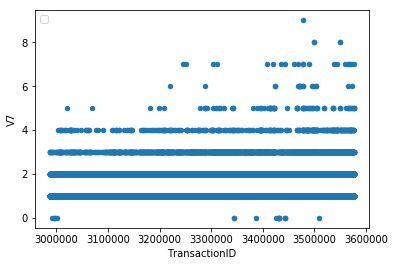

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is V8:


No handles with labels found to put in legend.


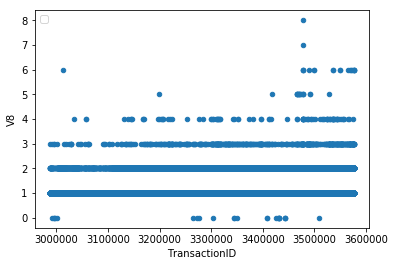

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is V9:


No handles with labels found to put in legend.


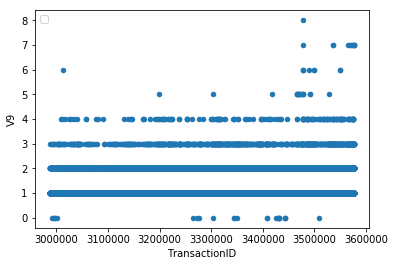

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is V10:


No handles with labels found to put in legend.


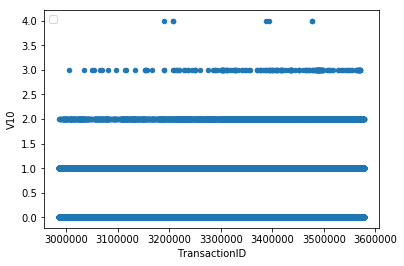

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is V11:


No handles with labels found to put in legend.


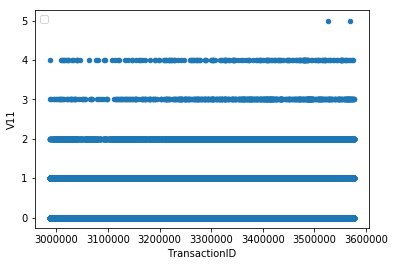

Missing data proportion is 0.47293494090154775
-------------------------------------
Column Name is V12:


No handles with labels found to put in legend.


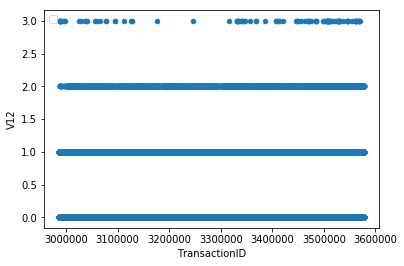

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V13:


No handles with labels found to put in legend.


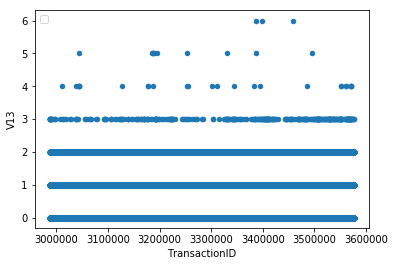

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V14:


No handles with labels found to put in legend.


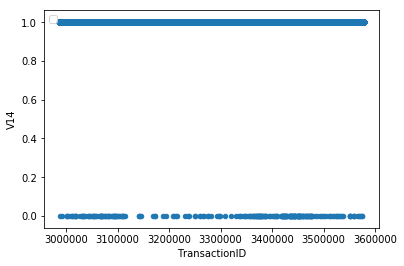

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V15:


No handles with labels found to put in legend.


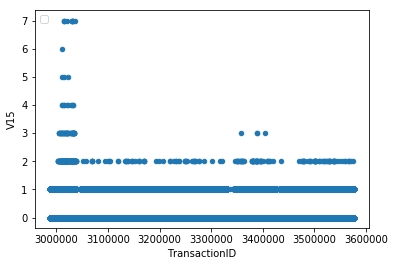

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V16:


No handles with labels found to put in legend.


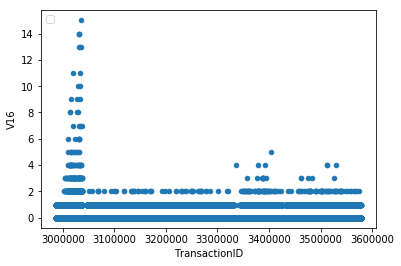

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V17:


No handles with labels found to put in legend.


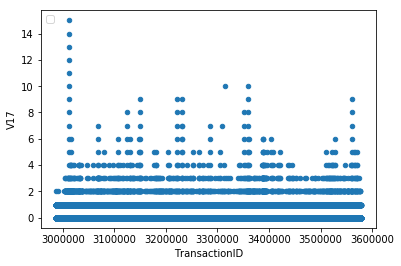

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V18:


No handles with labels found to put in legend.


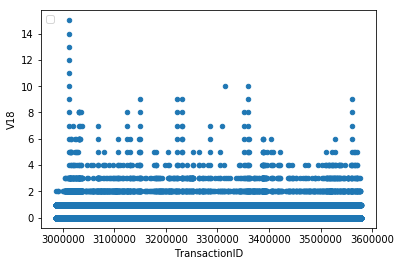

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V19:


No handles with labels found to put in legend.


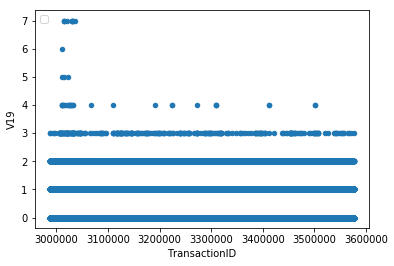

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V20:


No handles with labels found to put in legend.


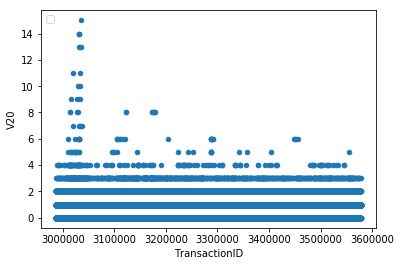

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V21:


No handles with labels found to put in legend.


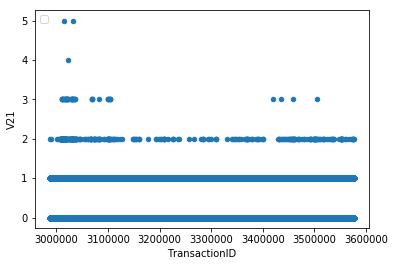

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V22:


No handles with labels found to put in legend.


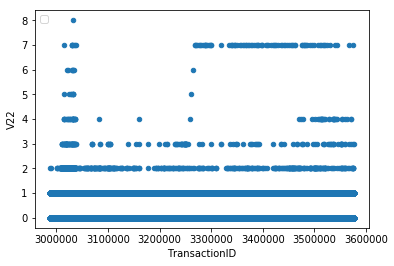

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V23:


No handles with labels found to put in legend.


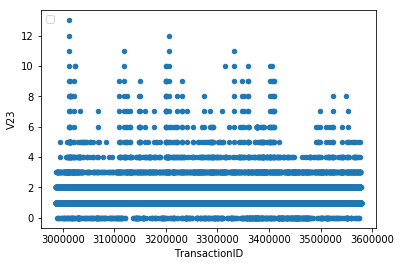

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V24:


No handles with labels found to put in legend.


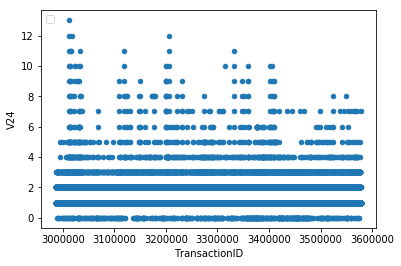

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V25:


No handles with labels found to put in legend.


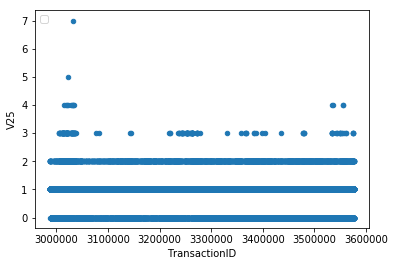

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V26:


No handles with labels found to put in legend.


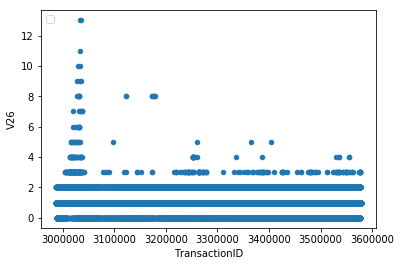

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V27:


No handles with labels found to put in legend.


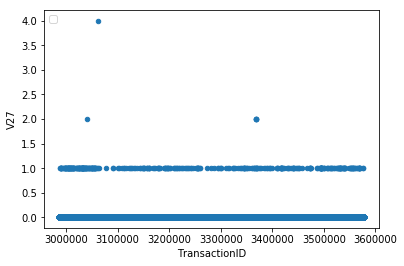

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V28:


No handles with labels found to put in legend.


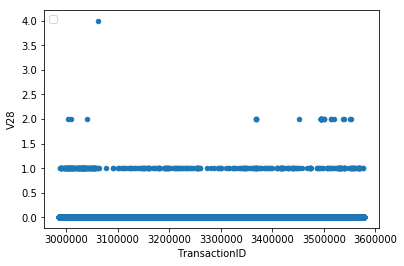

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V29:


No handles with labels found to put in legend.


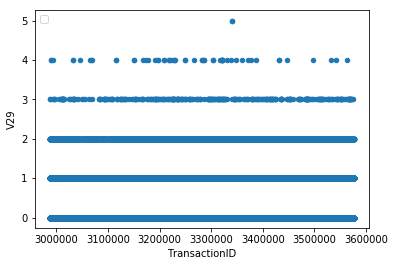

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V30:


No handles with labels found to put in legend.


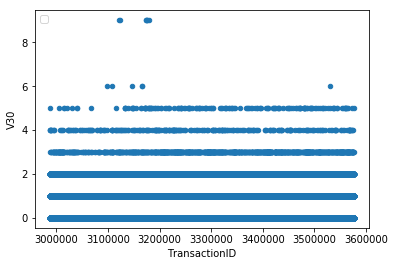

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V31:


No handles with labels found to put in legend.


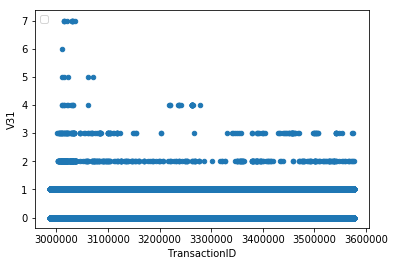

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V32:


No handles with labels found to put in legend.


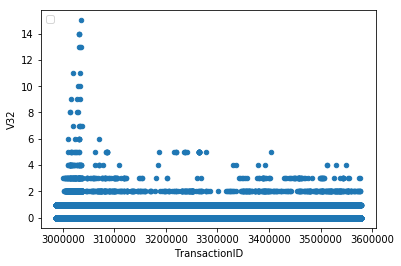

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V33:


No handles with labels found to put in legend.


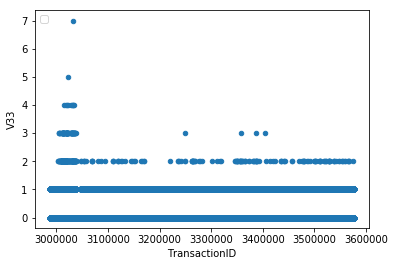

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V34:


No handles with labels found to put in legend.


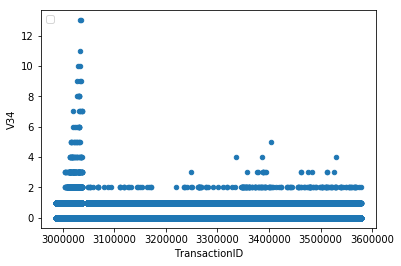

Missing data proportion is 0.12881938564703488
-------------------------------------
Column Name is V35:


No handles with labels found to put in legend.


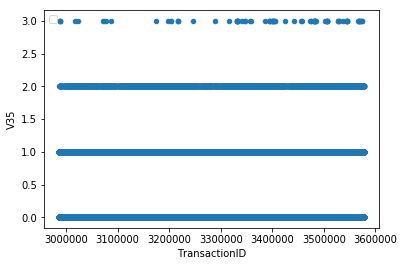

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V36:


No handles with labels found to put in legend.


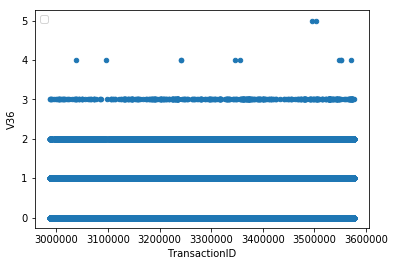

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V37:


No handles with labels found to put in legend.


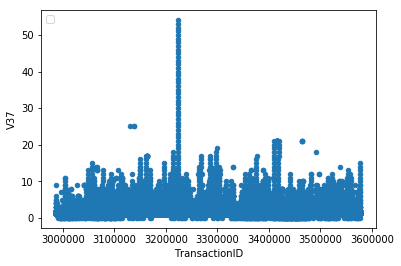

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V38:


No handles with labels found to put in legend.


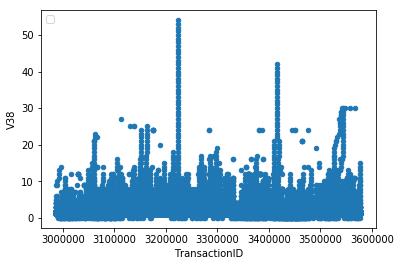

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V39:


No handles with labels found to put in legend.


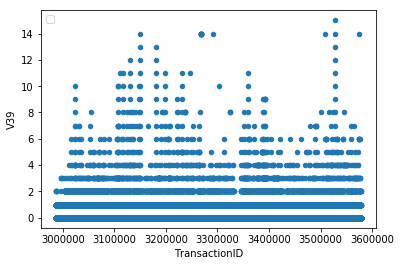

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V40:


No handles with labels found to put in legend.


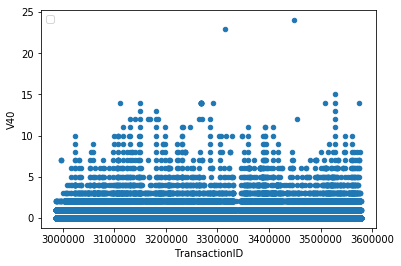

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V41:


No handles with labels found to put in legend.


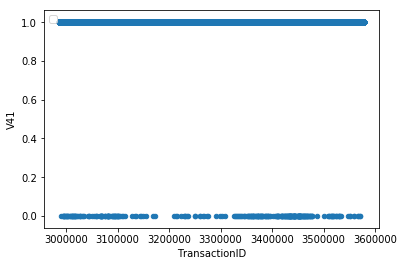

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V42:


No handles with labels found to put in legend.


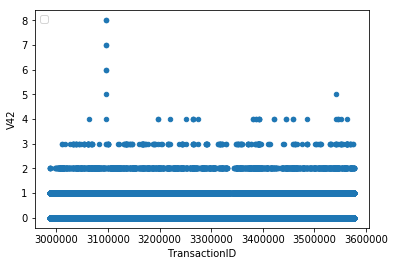

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V43:


No handles with labels found to put in legend.


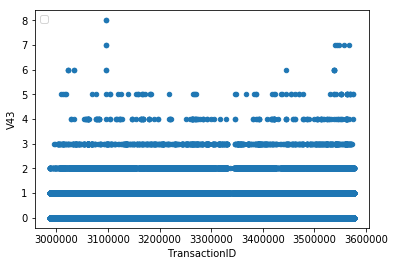

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V44:


No handles with labels found to put in legend.


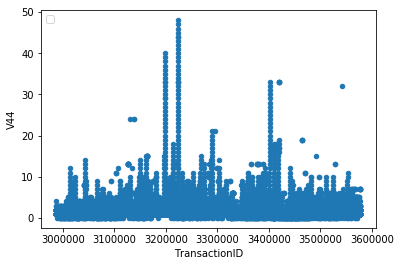

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V45:


No handles with labels found to put in legend.


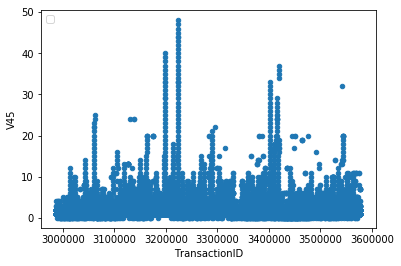

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V46:


No handles with labels found to put in legend.


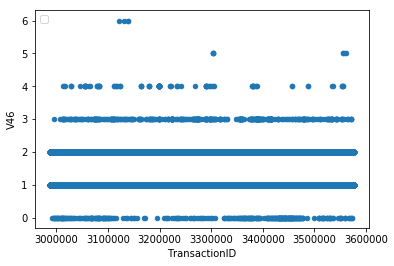

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V47:


No handles with labels found to put in legend.


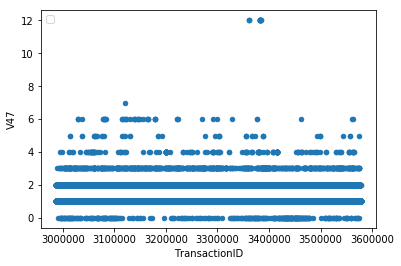

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V48:


No handles with labels found to put in legend.


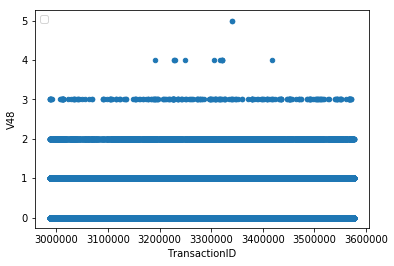

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V49:


No handles with labels found to put in legend.


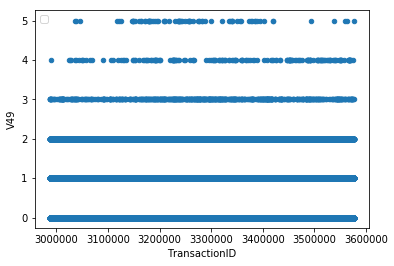

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V50:


No handles with labels found to put in legend.


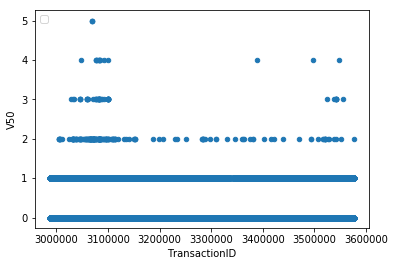

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V51:


No handles with labels found to put in legend.


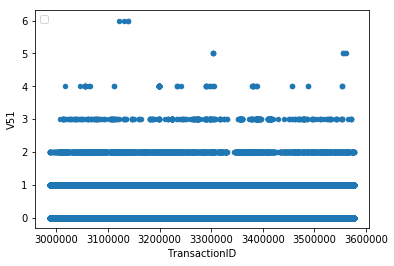

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V52:


No handles with labels found to put in legend.


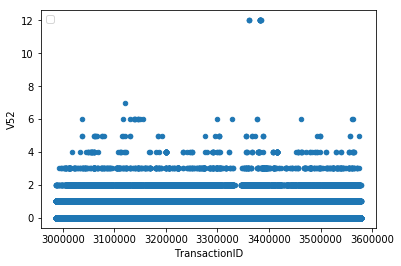

Missing data proportion is 0.28612625732380537
-------------------------------------
Column Name is V53:


No handles with labels found to put in legend.


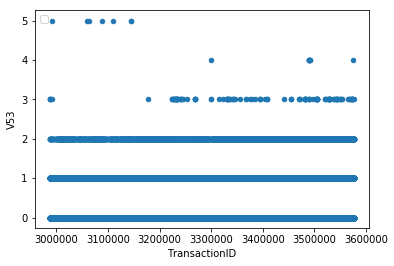

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V54:


No handles with labels found to put in legend.


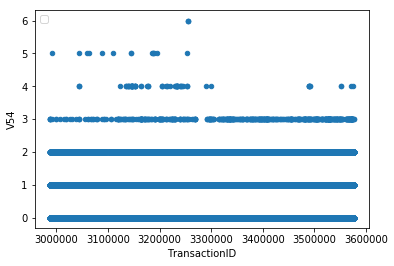

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V55:


No handles with labels found to put in legend.


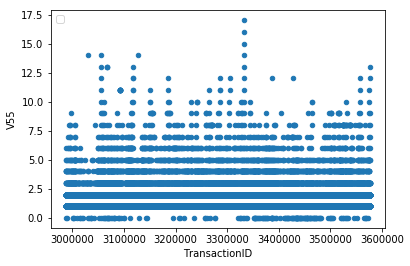

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V56:


No handles with labels found to put in legend.


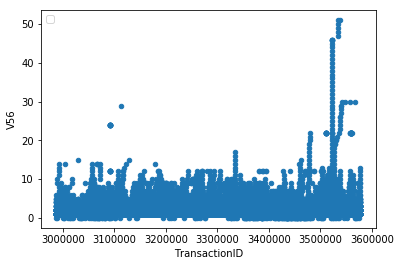

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V57:


No handles with labels found to put in legend.


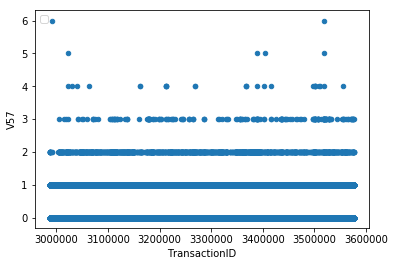

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V58:


No handles with labels found to put in legend.


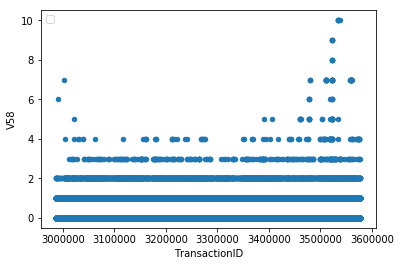

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V59:


No handles with labels found to put in legend.


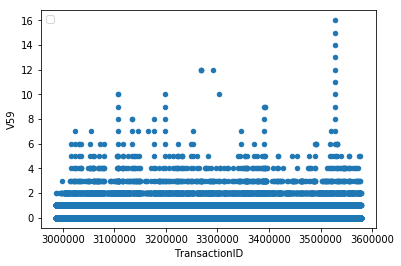

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V60:


No handles with labels found to put in legend.


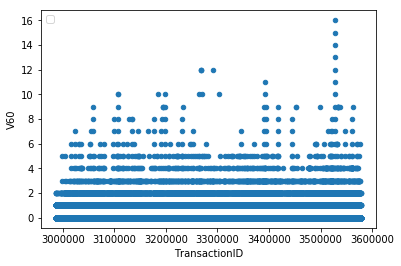

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V61:


No handles with labels found to put in legend.


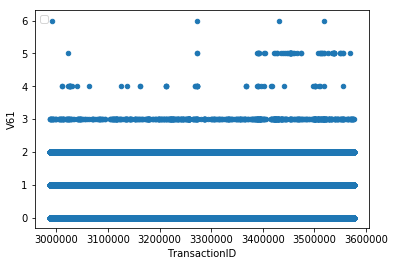

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V62:


No handles with labels found to put in legend.


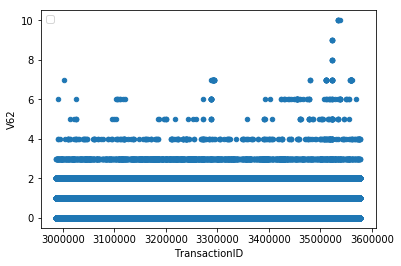

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V63:


No handles with labels found to put in legend.


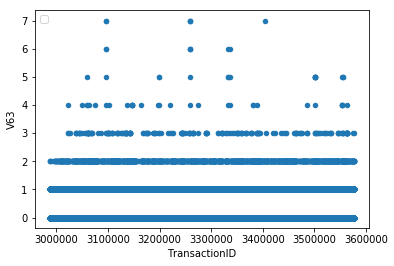

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V64:


No handles with labels found to put in legend.


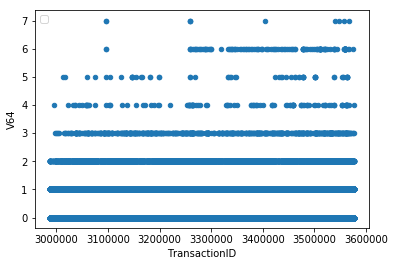

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V65:


No handles with labels found to put in legend.


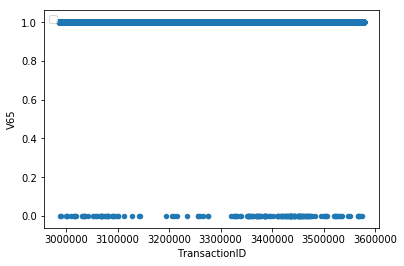

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V66:


No handles with labels found to put in legend.


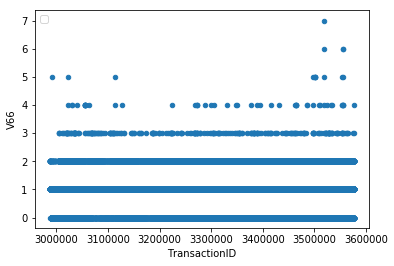

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V67:


No handles with labels found to put in legend.


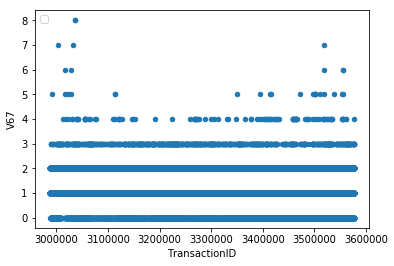

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V68:


No handles with labels found to put in legend.


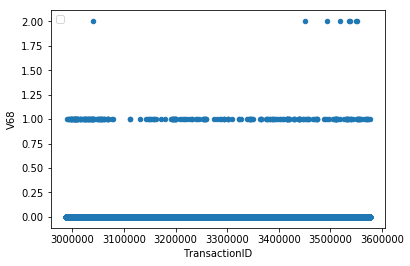

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V69:


No handles with labels found to put in legend.


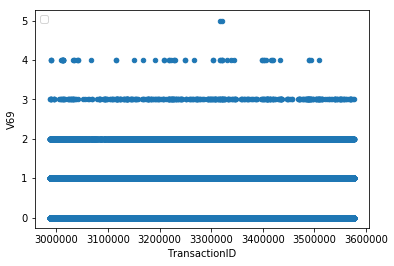

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V70:


No handles with labels found to put in legend.


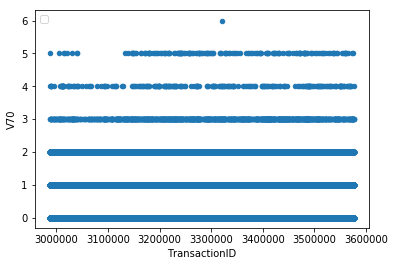

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V71:


No handles with labels found to put in legend.


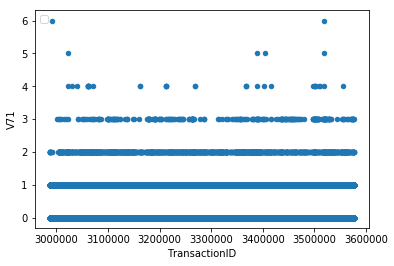

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V72:


No handles with labels found to put in legend.


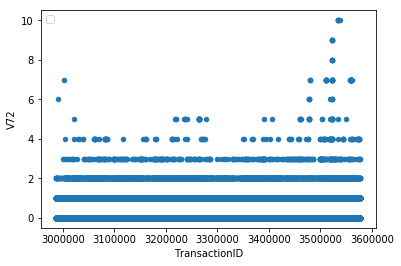

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V73:


No handles with labels found to put in legend.


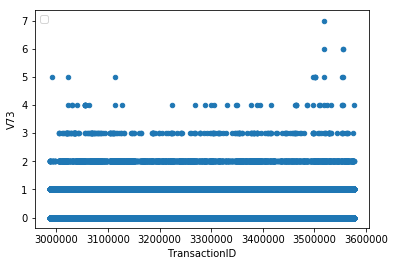

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V74:


No handles with labels found to put in legend.


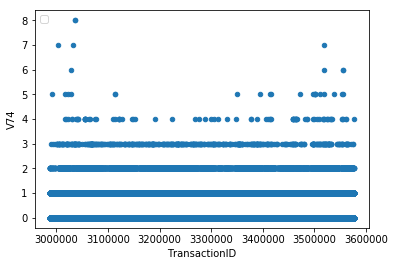

Missing data proportion is 0.13055169844549053
-------------------------------------
Column Name is V75:


No handles with labels found to put in legend.


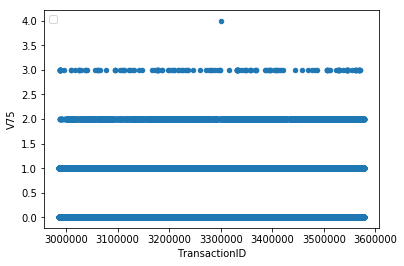

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V76:


No handles with labels found to put in legend.


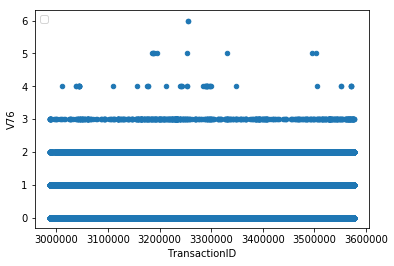

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V77:


No handles with labels found to put in legend.


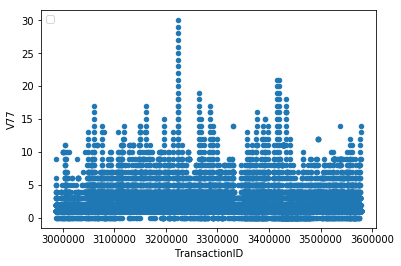

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V78:


No handles with labels found to put in legend.


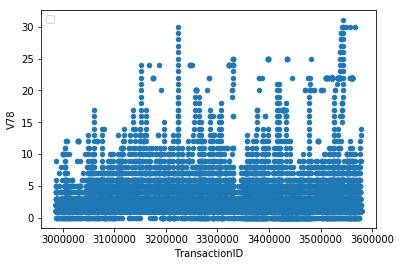

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V79:


No handles with labels found to put in legend.


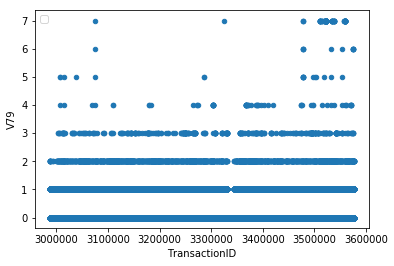

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V80:


No handles with labels found to put in legend.


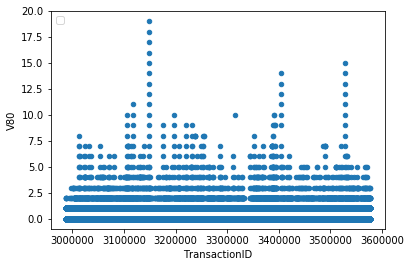

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V81:


No handles with labels found to put in legend.


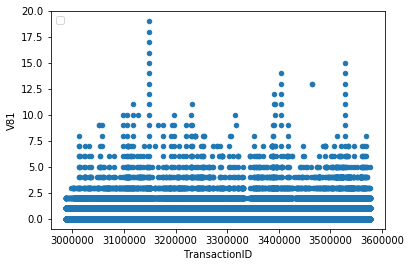

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V82:


No handles with labels found to put in legend.


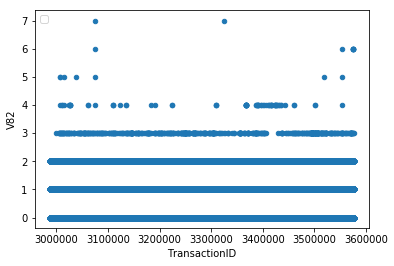

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V83:


No handles with labels found to put in legend.


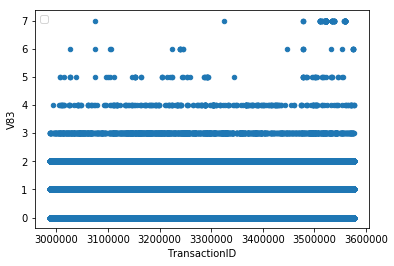

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V84:


No handles with labels found to put in legend.


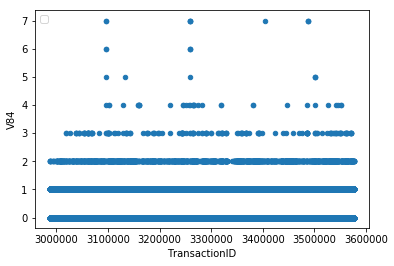

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V85:


No handles with labels found to put in legend.


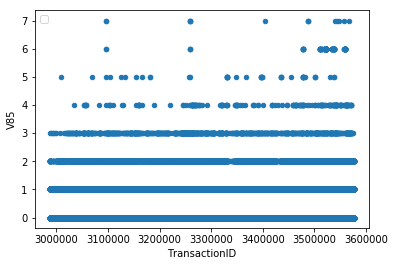

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V86:


No handles with labels found to put in legend.


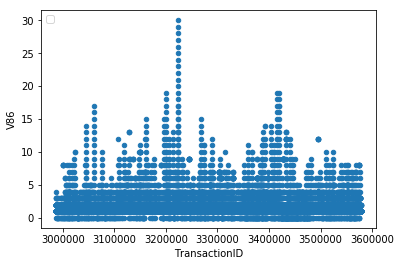

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V87:


No handles with labels found to put in legend.


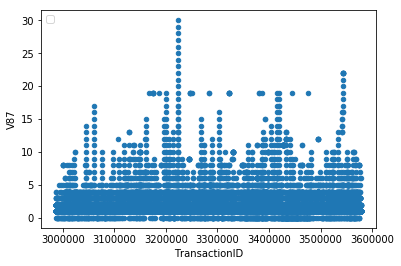

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V88:


No handles with labels found to put in legend.


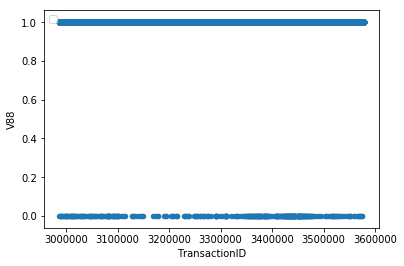

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V89:


No handles with labels found to put in legend.


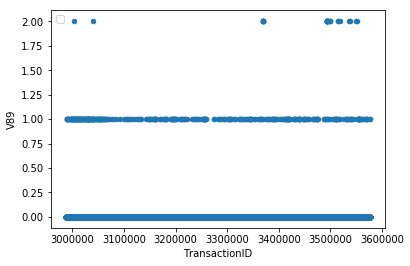

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V90:


No handles with labels found to put in legend.


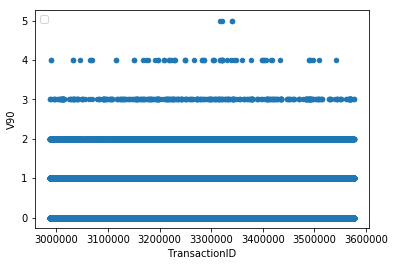

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V91:


No handles with labels found to put in legend.


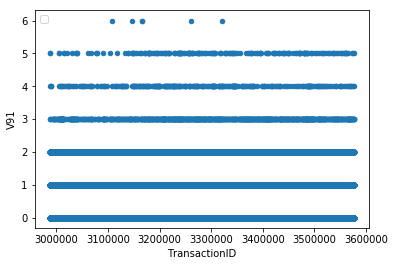

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V92:


No handles with labels found to put in legend.


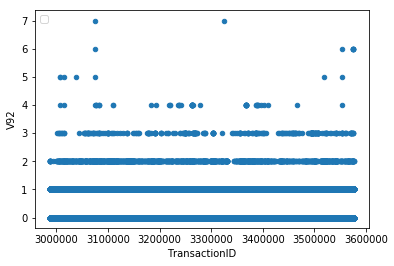

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V93:


No handles with labels found to put in legend.


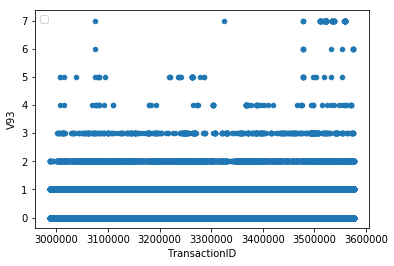

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V94:


No handles with labels found to put in legend.


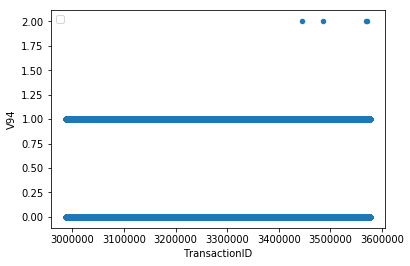

Missing data proportion is 0.15098723202492637
-------------------------------------
Column Name is V95:


No handles with labels found to put in legend.


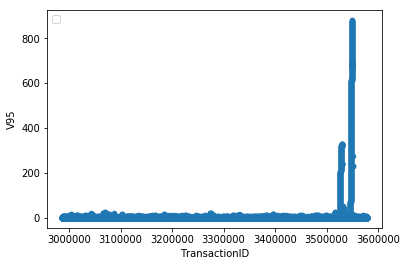

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V96:


No handles with labels found to put in legend.


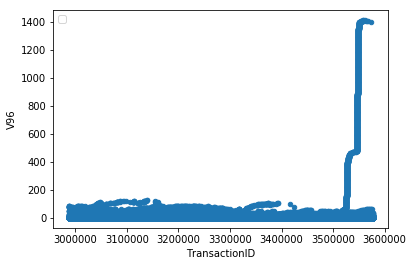

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V97:


No handles with labels found to put in legend.


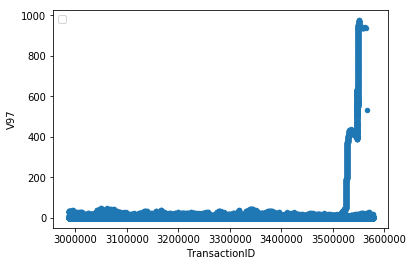

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V98:


No handles with labels found to put in legend.


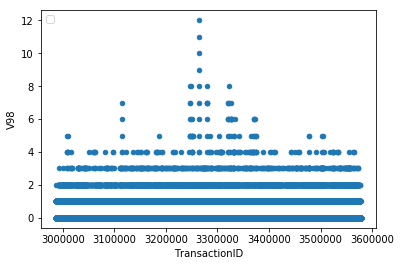

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V99:


No handles with labels found to put in legend.


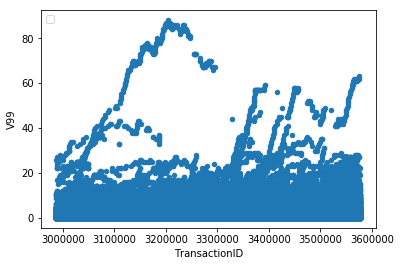

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V100:


No handles with labels found to put in legend.


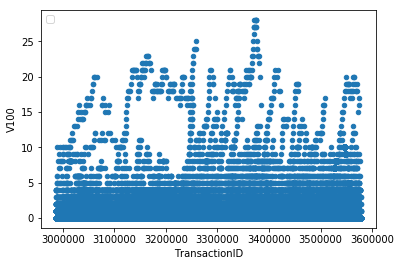

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V101:


No handles with labels found to put in legend.


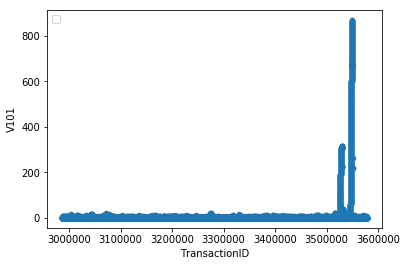

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V102:


No handles with labels found to put in legend.


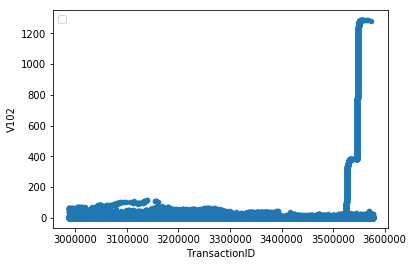

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V103:


No handles with labels found to put in legend.


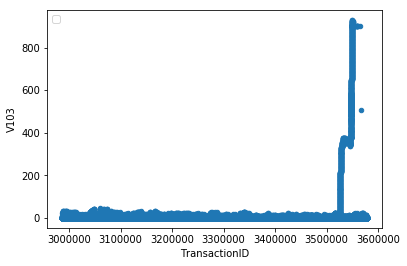

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V104:


No handles with labels found to put in legend.


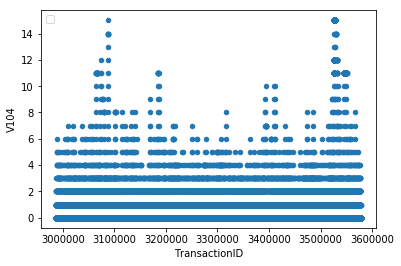

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V105:


No handles with labels found to put in legend.


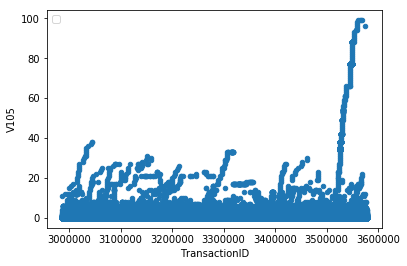

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V106:


No handles with labels found to put in legend.


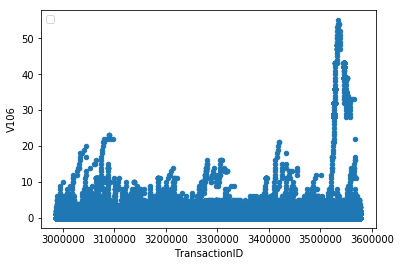

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V107:


No handles with labels found to put in legend.


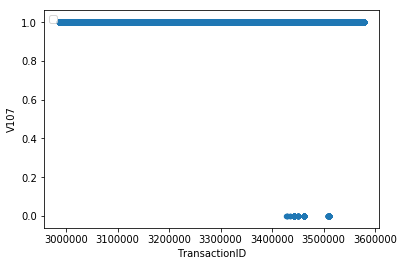

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V108:


No handles with labels found to put in legend.


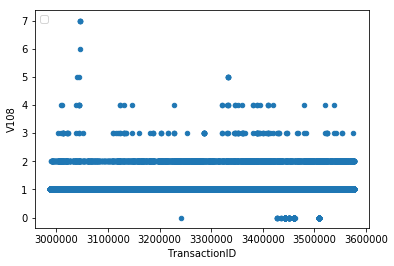

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V109:


No handles with labels found to put in legend.


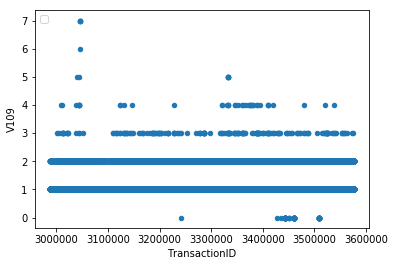

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V110:


No handles with labels found to put in legend.


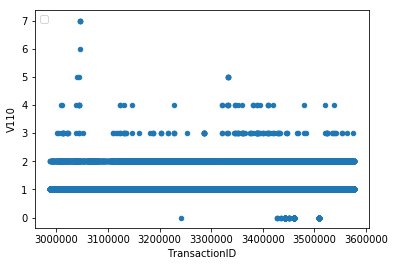

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V111:


No handles with labels found to put in legend.


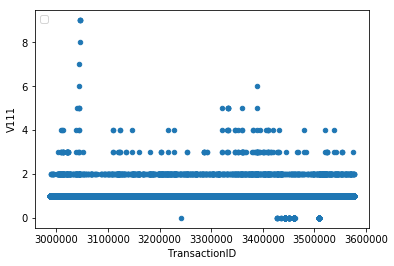

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V112:


No handles with labels found to put in legend.


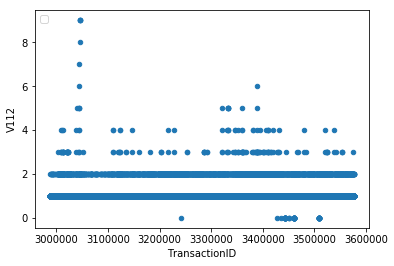

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V113:


No handles with labels found to put in legend.


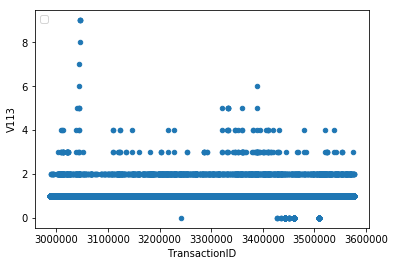

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V114:


No handles with labels found to put in legend.


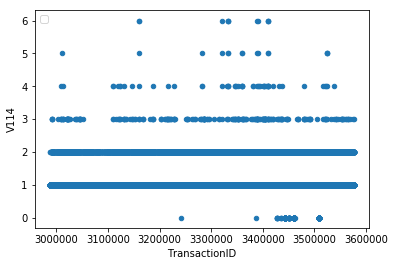

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V115:


No handles with labels found to put in legend.


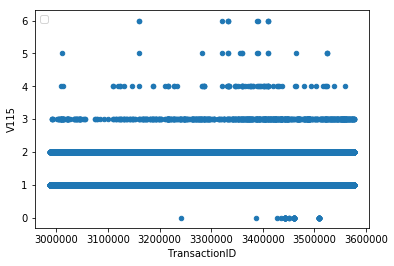

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V116:


No handles with labels found to put in legend.


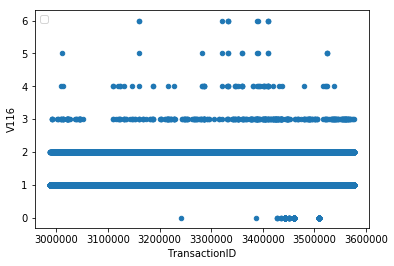

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V117:


No handles with labels found to put in legend.


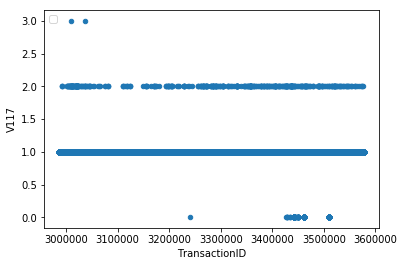

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V118:


No handles with labels found to put in legend.


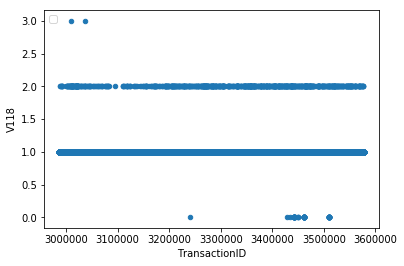

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V119:


No handles with labels found to put in legend.


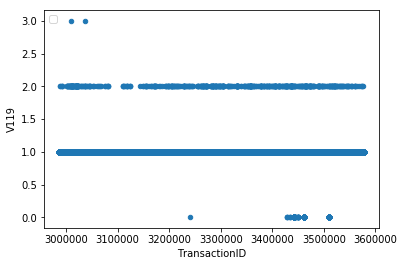

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V120:


No handles with labels found to put in legend.


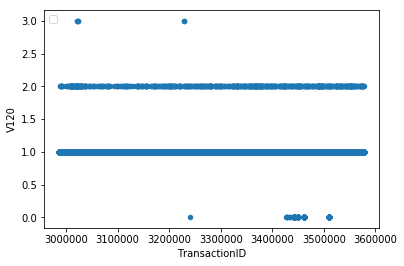

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V121:


No handles with labels found to put in legend.


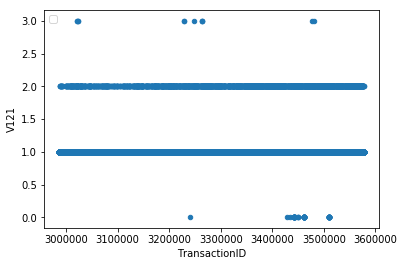

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V122:


No handles with labels found to put in legend.


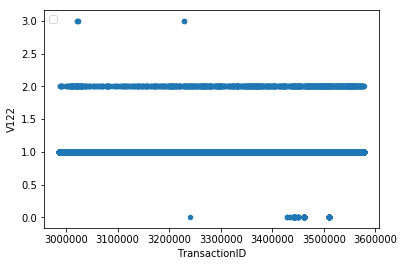

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V123:


No handles with labels found to put in legend.


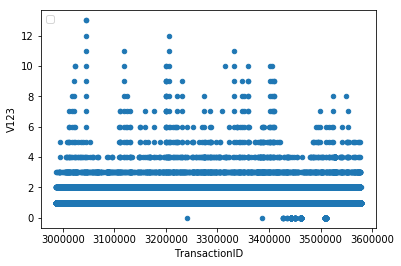

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V124:


No handles with labels found to put in legend.


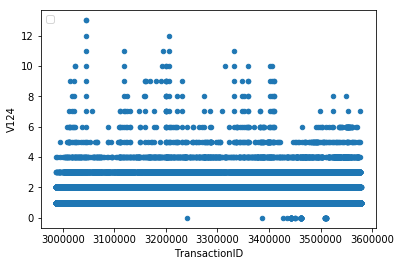

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V125:


No handles with labels found to put in legend.


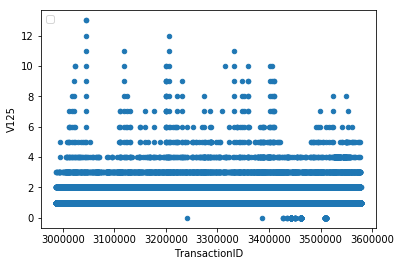

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V126:


No handles with labels found to put in legend.


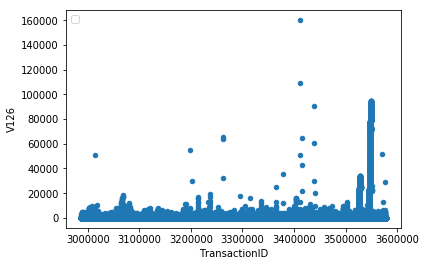

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V127:


No handles with labels found to put in legend.


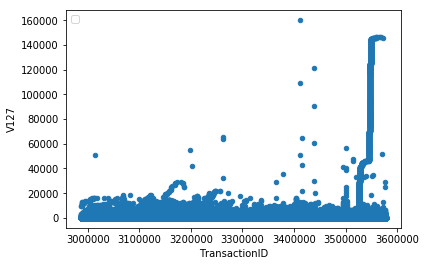

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V128:


No handles with labels found to put in legend.


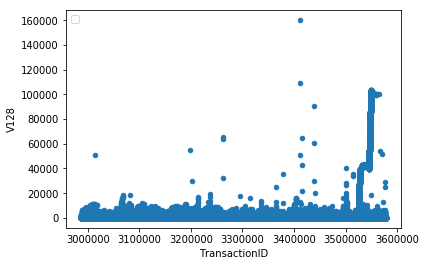

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V129:


No handles with labels found to put in legend.


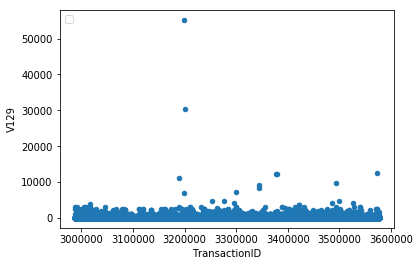

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V130:


No handles with labels found to put in legend.


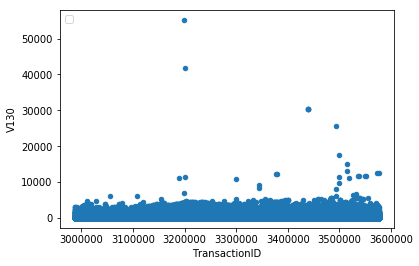

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V131:


No handles with labels found to put in legend.


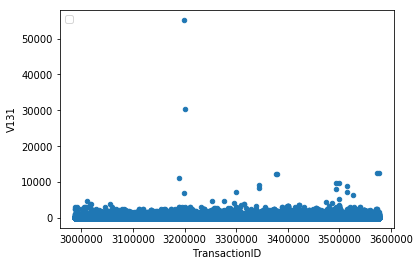

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V132:


No handles with labels found to put in legend.


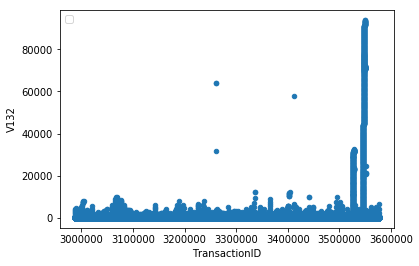

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V133:


No handles with labels found to put in legend.


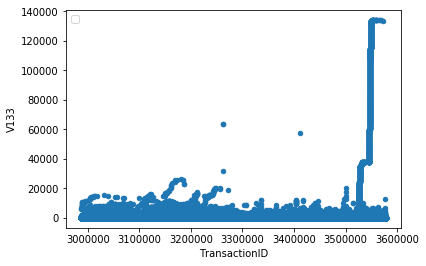

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V134:


No handles with labels found to put in legend.


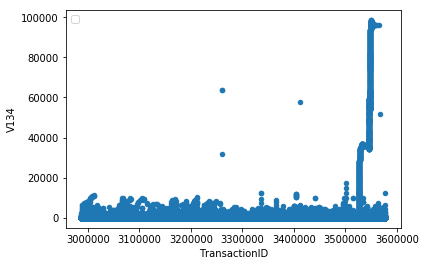

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V135:


No handles with labels found to put in legend.


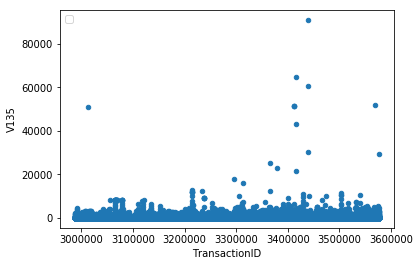

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V136:


No handles with labels found to put in legend.


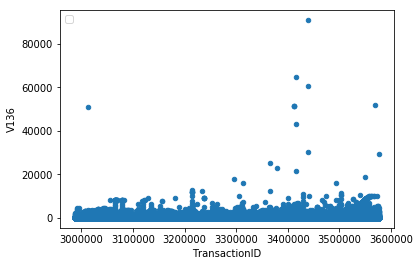

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V137:


No handles with labels found to put in legend.


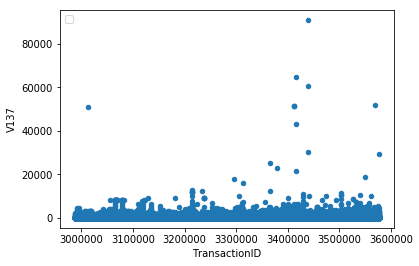

Missing data proportion is 0.0005317167338367845
-------------------------------------
Column Name is V138:


No handles with labels found to put in legend.


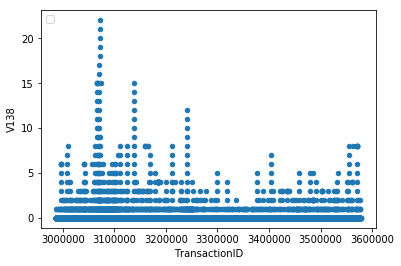

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V139:


No handles with labels found to put in legend.


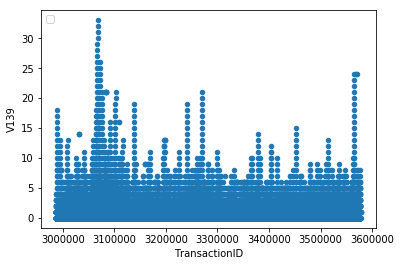

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V140:


No handles with labels found to put in legend.


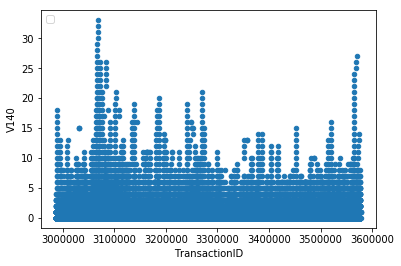

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V141:


No handles with labels found to put in legend.


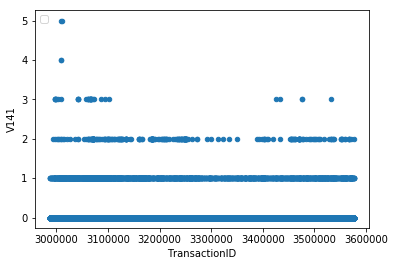

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V142:


No handles with labels found to put in legend.


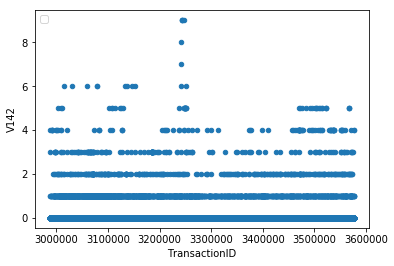

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V143:


No handles with labels found to put in legend.


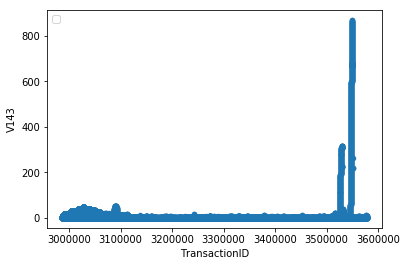

Missing data proportion is 0.8612270125647712
-------------------------------------
Column Name is V144:


No handles with labels found to put in legend.


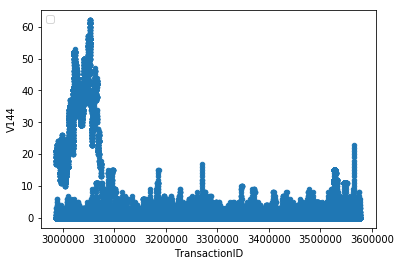

Missing data proportion is 0.8612270125647712
-------------------------------------
Column Name is V145:


No handles with labels found to put in legend.


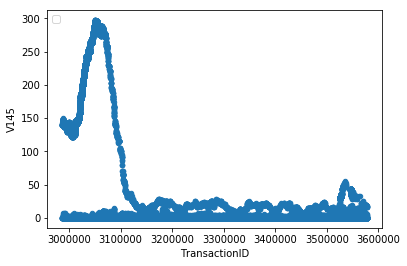

Missing data proportion is 0.8612270125647712
-------------------------------------
Column Name is V146:


No handles with labels found to put in legend.


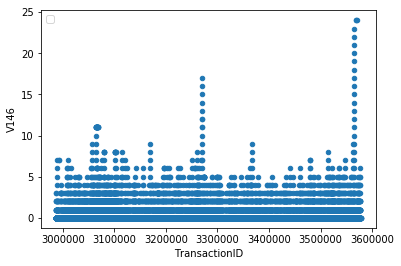

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V147:


No handles with labels found to put in legend.


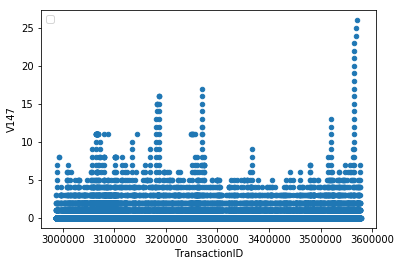

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V148:


No handles with labels found to put in legend.


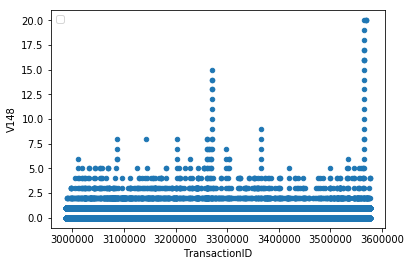

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V149:


No handles with labels found to put in legend.


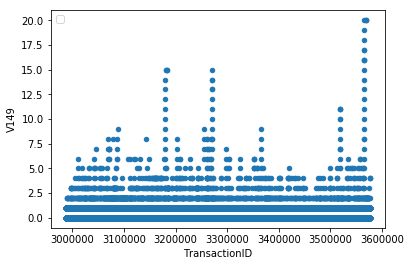

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V150:


No handles with labels found to put in legend.


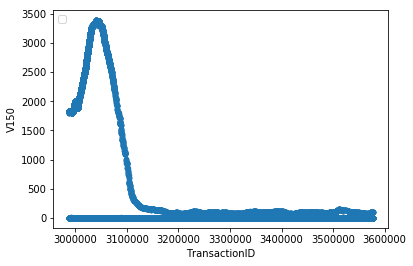

Missing data proportion is 0.8612270125647712
-------------------------------------
Column Name is V151:


No handles with labels found to put in legend.


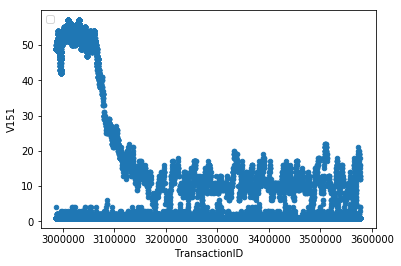

Missing data proportion is 0.8612270125647712
-------------------------------------
Column Name is V152:


No handles with labels found to put in legend.


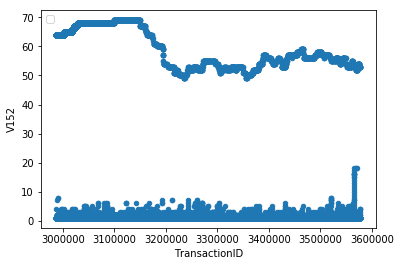

Missing data proportion is 0.8612270125647712
-------------------------------------
Column Name is V153:


No handles with labels found to put in legend.


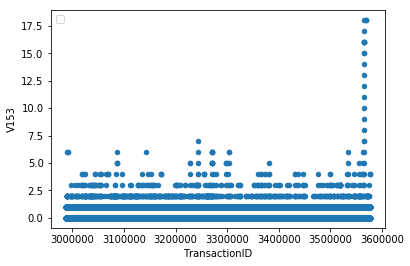

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V154:


No handles with labels found to put in legend.


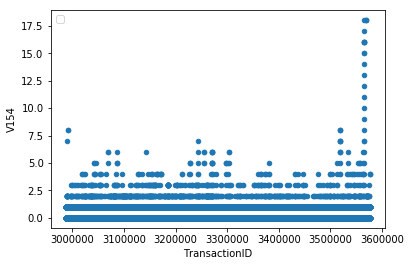

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V155:


No handles with labels found to put in legend.


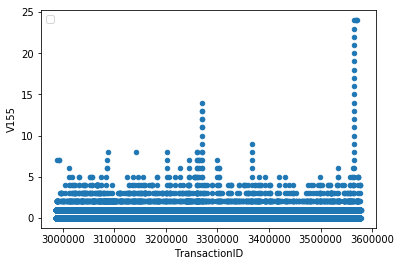

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V156:


No handles with labels found to put in legend.


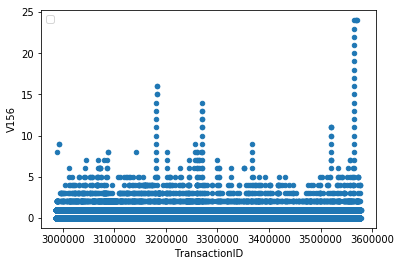

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V157:


No handles with labels found to put in legend.


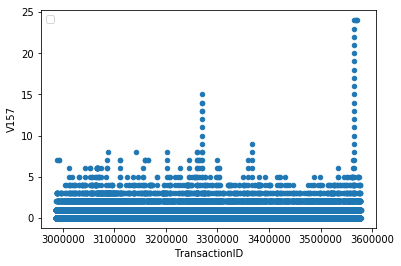

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V158:


No handles with labels found to put in legend.


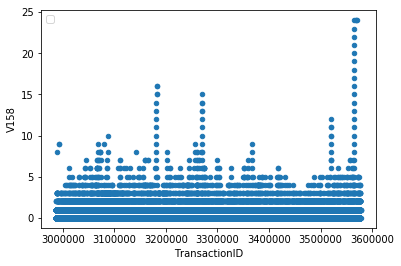

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V159:


No handles with labels found to put in legend.


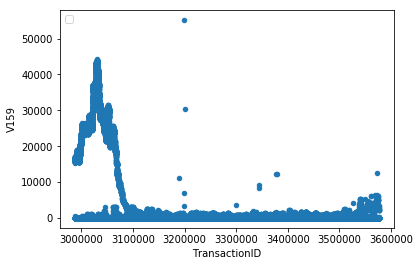

Missing data proportion is 0.8612270125647712
-------------------------------------
Column Name is V160:


No handles with labels found to put in legend.


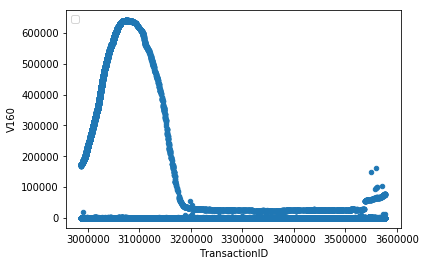

Missing data proportion is 0.8612270125647712
-------------------------------------
Column Name is V161:


No handles with labels found to put in legend.


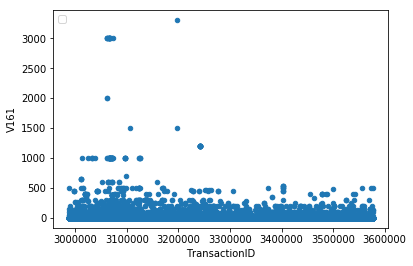

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V162:


No handles with labels found to put in legend.


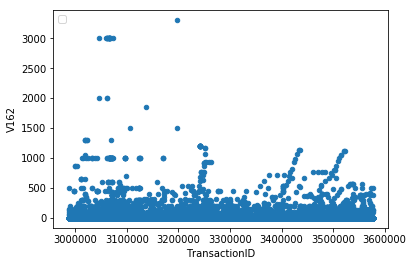

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V163:


No handles with labels found to put in legend.


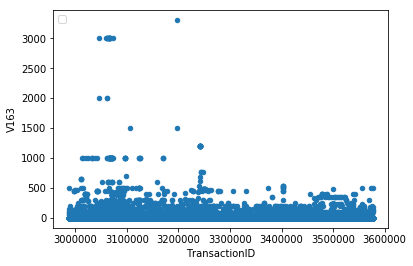

Missing data proportion is 0.8612371727571375
-------------------------------------
Column Name is V164:


No handles with labels found to put in legend.


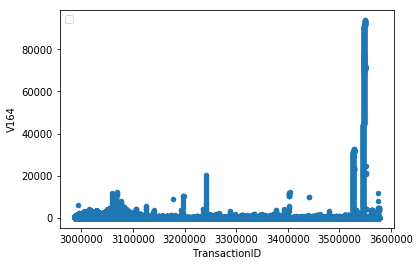

Missing data proportion is 0.8612270125647712
-------------------------------------
Column Name is V165:


No handles with labels found to put in legend.


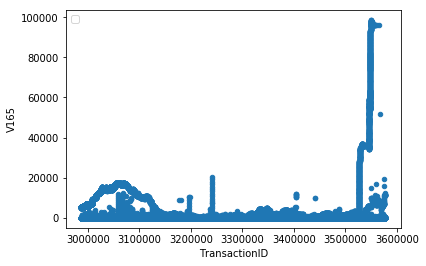

Missing data proportion is 0.8612270125647712
-------------------------------------
Column Name is V166:


No handles with labels found to put in legend.


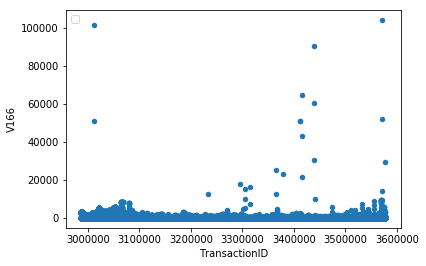

Missing data proportion is 0.8612270125647712
-------------------------------------
Column Name is V167:


No handles with labels found to put in legend.


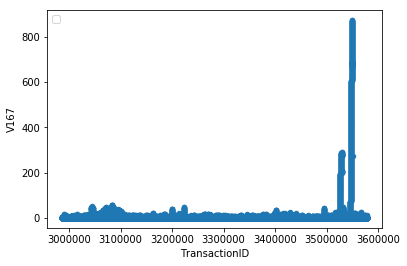

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V168:


No handles with labels found to put in legend.


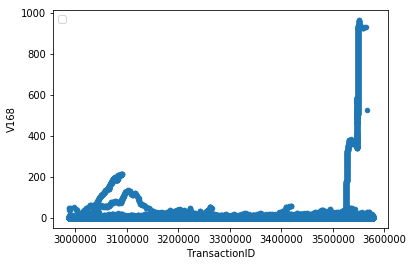

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V169:


No handles with labels found to put in legend.


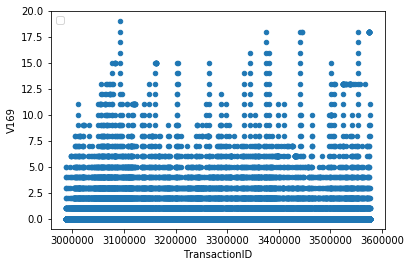

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V170:


No handles with labels found to put in legend.


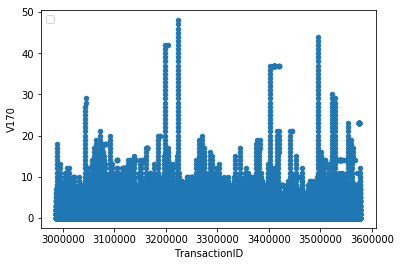

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V171:


No handles with labels found to put in legend.


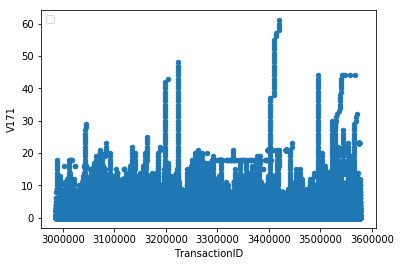

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V172:


No handles with labels found to put in legend.


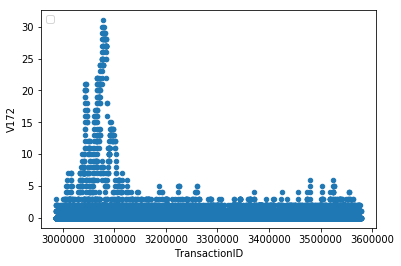

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V173:


No handles with labels found to put in legend.


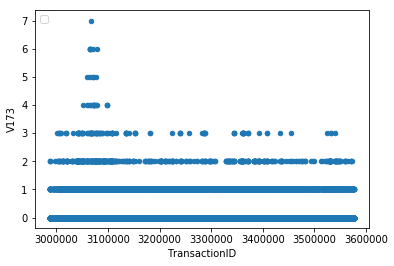

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V174:


No handles with labels found to put in legend.


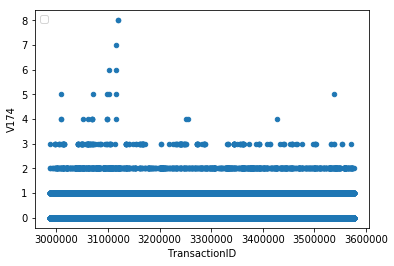

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V175:


No handles with labels found to put in legend.


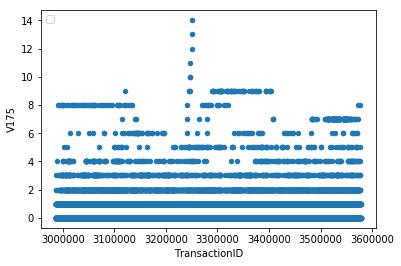

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V176:


No handles with labels found to put in legend.


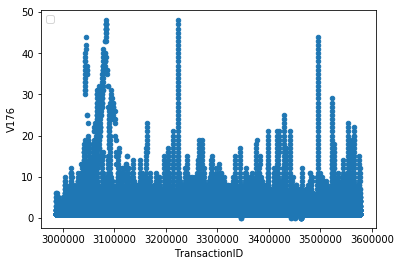

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V177:


No handles with labels found to put in legend.


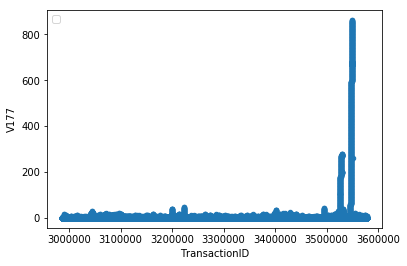

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V178:


No handles with labels found to put in legend.


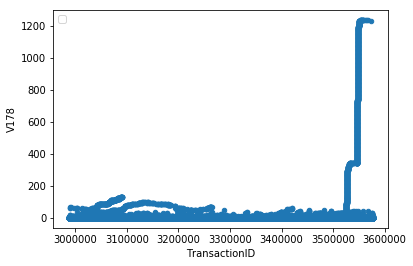

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V179:


No handles with labels found to put in legend.


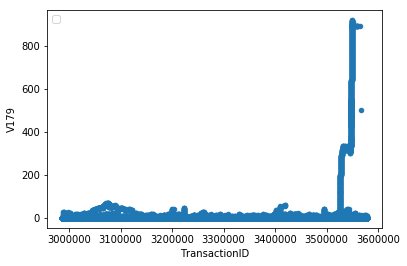

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V180:


No handles with labels found to put in legend.


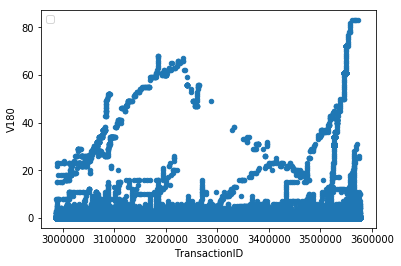

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V181:


No handles with labels found to put in legend.


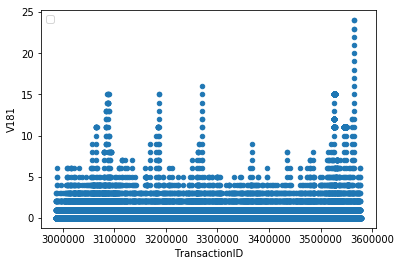

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V182:


No handles with labels found to put in legend.


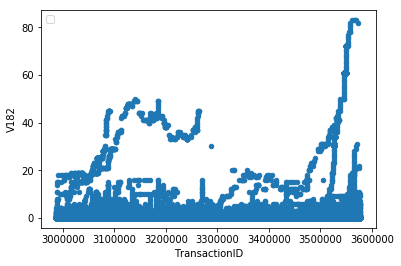

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V183:


No handles with labels found to put in legend.


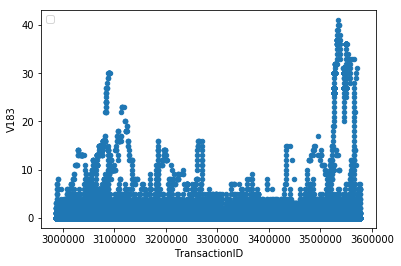

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V184:


No handles with labels found to put in legend.


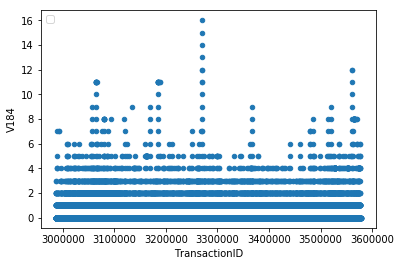

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V185:


No handles with labels found to put in legend.


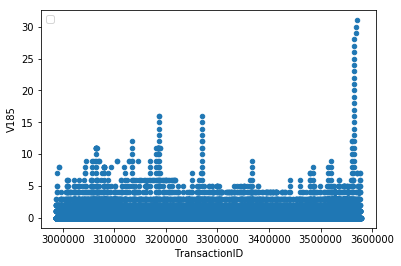

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V186:


No handles with labels found to put in legend.


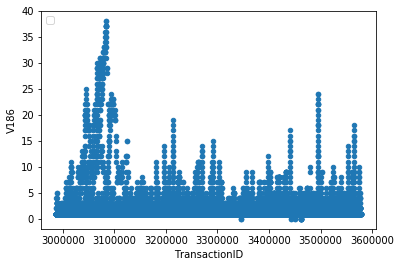

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V187:


No handles with labels found to put in legend.


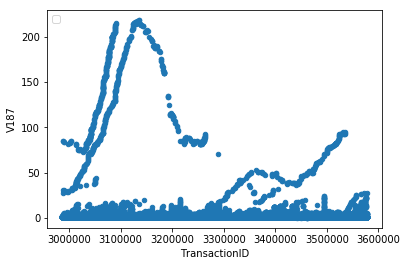

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V188:


No handles with labels found to put in legend.


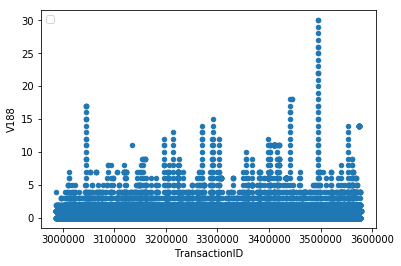

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V189:


No handles with labels found to put in legend.


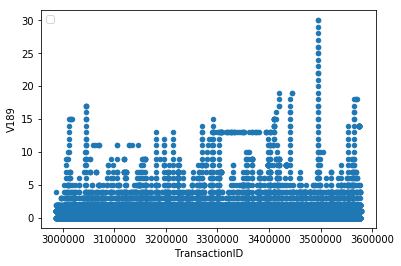

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V190:


No handles with labels found to put in legend.


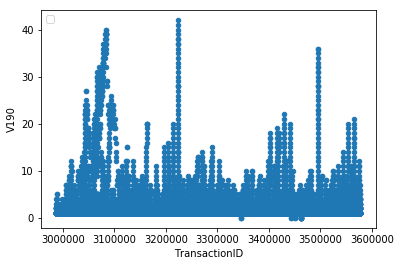

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V191:


No handles with labels found to put in legend.


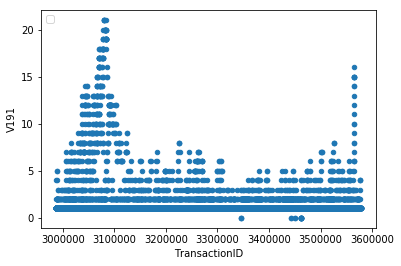

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V192:


No handles with labels found to put in legend.


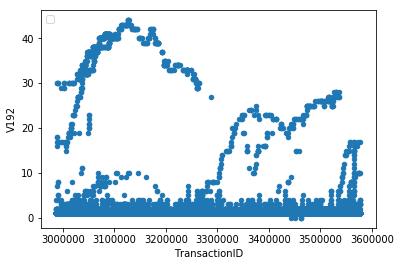

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V193:


No handles with labels found to put in legend.


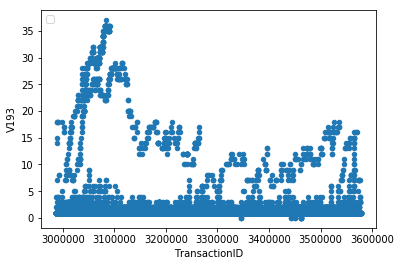

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V194:


No handles with labels found to put in legend.


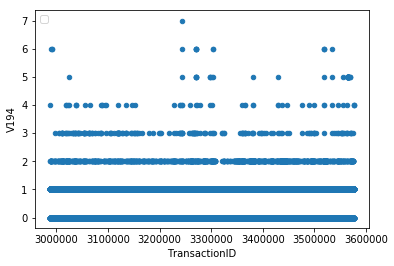

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V195:


No handles with labels found to put in legend.


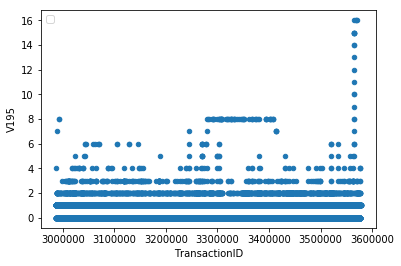

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V196:


No handles with labels found to put in legend.


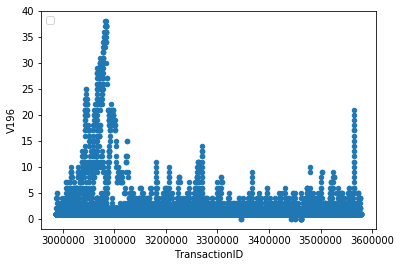

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V197:


No handles with labels found to put in legend.


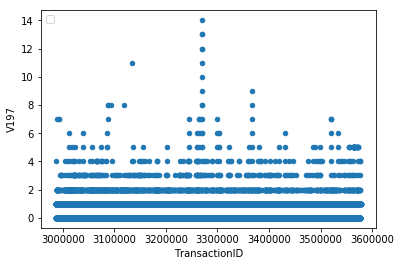

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V198:


No handles with labels found to put in legend.


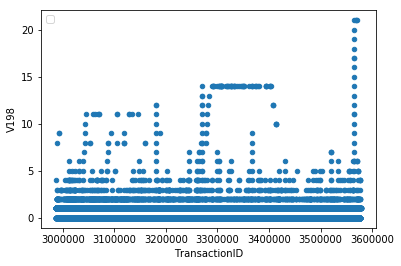

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V199:


No handles with labels found to put in legend.


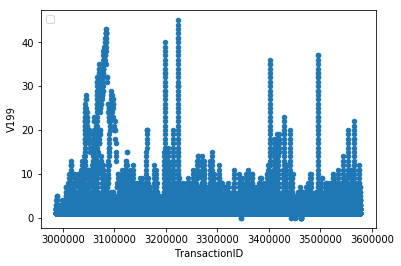

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V200:


No handles with labels found to put in legend.


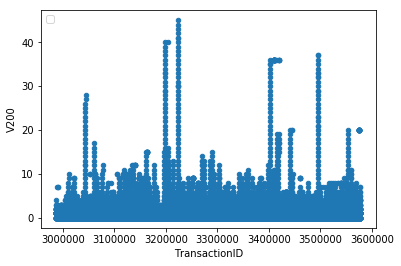

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V201:


No handles with labels found to put in legend.


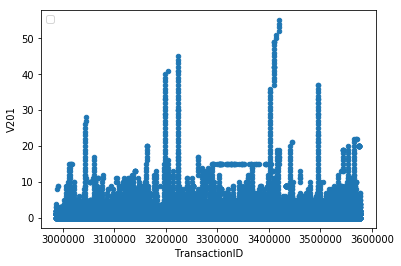

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V202:


No handles with labels found to put in legend.


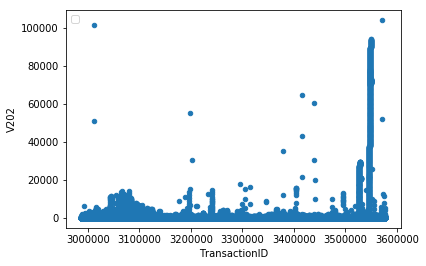

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V203:


No handles with labels found to put in legend.


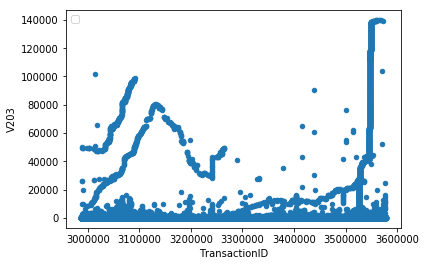

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V204:


No handles with labels found to put in legend.


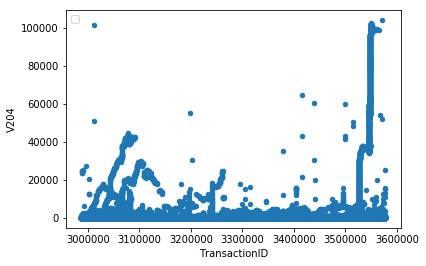

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V205:


No handles with labels found to put in legend.


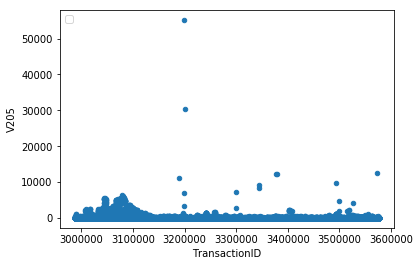

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V206:


No handles with labels found to put in legend.


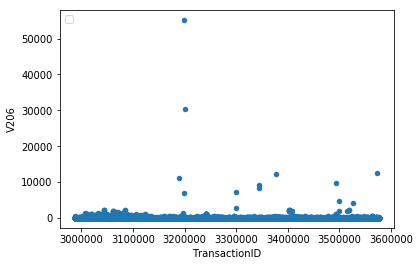

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V207:


No handles with labels found to put in legend.


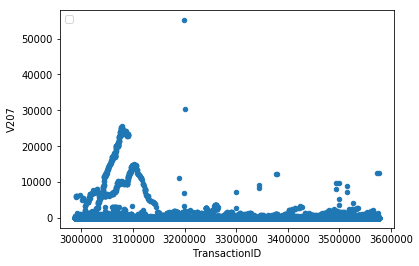

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V208:


No handles with labels found to put in legend.


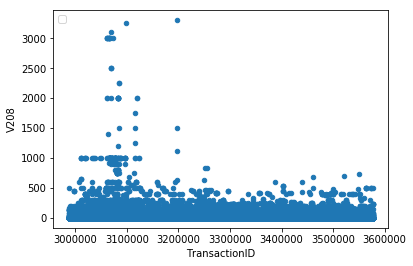

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V209:


No handles with labels found to put in legend.


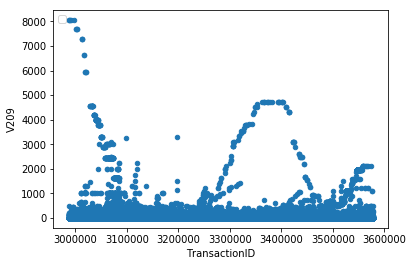

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V210:


No handles with labels found to put in legend.


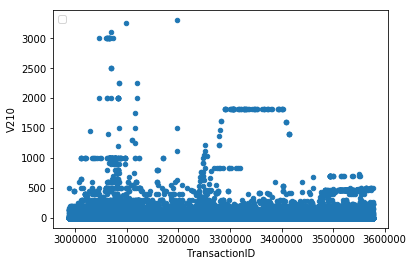

Missing data proportion is 0.7632353439225116
-------------------------------------
Column Name is V211:


No handles with labels found to put in legend.


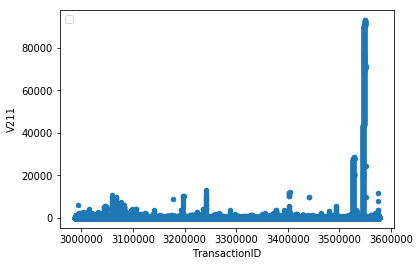

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V212:


No handles with labels found to put in legend.


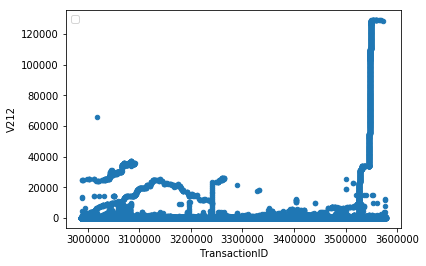

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V213:


No handles with labels found to put in legend.


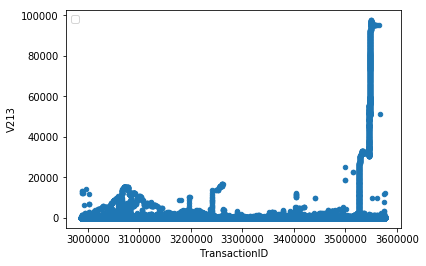

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V214:


No handles with labels found to put in legend.


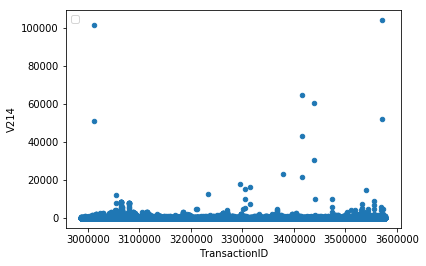

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V215:


No handles with labels found to put in legend.


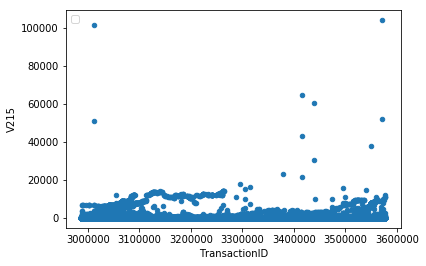

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V216:


No handles with labels found to put in legend.


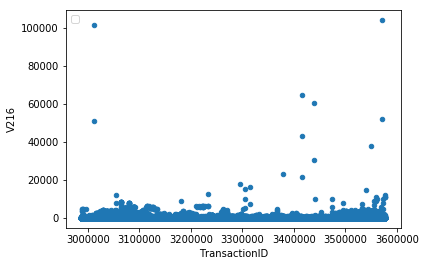

Missing data proportion is 0.763553696616656
-------------------------------------
Column Name is V217:


No handles with labels found to put in legend.


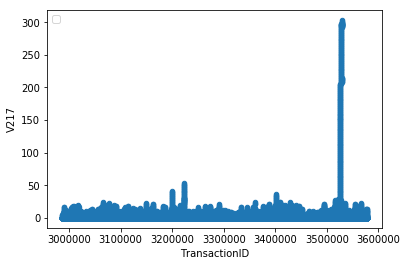

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V218:


No handles with labels found to put in legend.


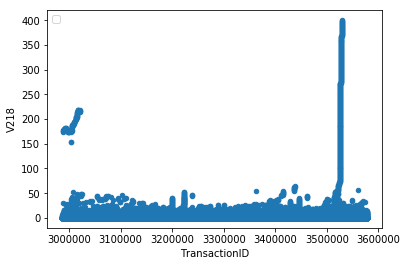

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V219:


No handles with labels found to put in legend.


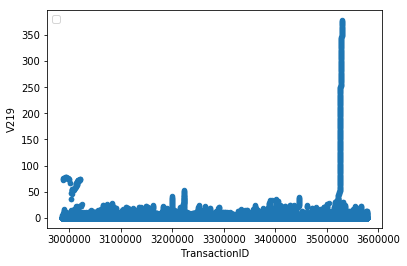

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V220:


No handles with labels found to put in legend.


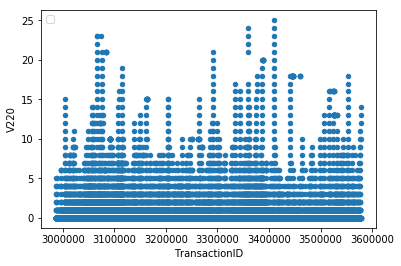

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V221:


No handles with labels found to put in legend.


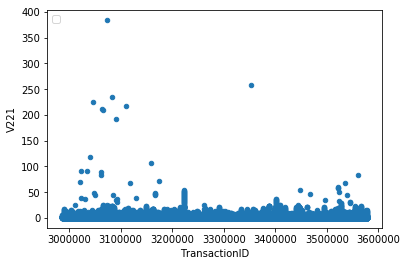

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V222:


No handles with labels found to put in legend.


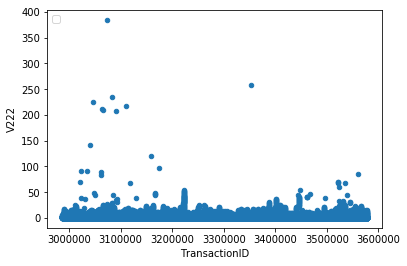

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V223:


No handles with labels found to put in legend.


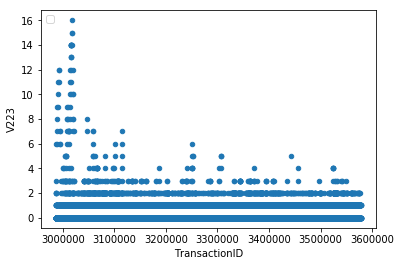

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V224:


No handles with labels found to put in legend.


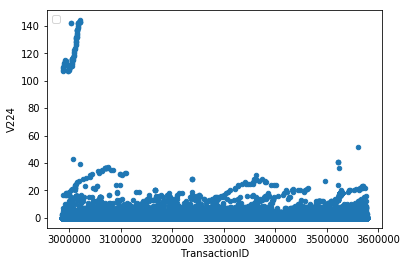

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V225:


No handles with labels found to put in legend.


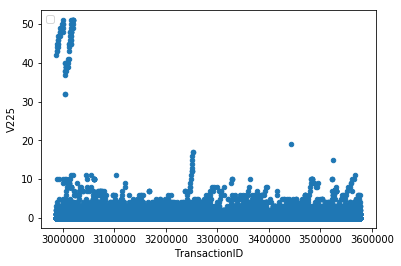

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V226:


No handles with labels found to put in legend.


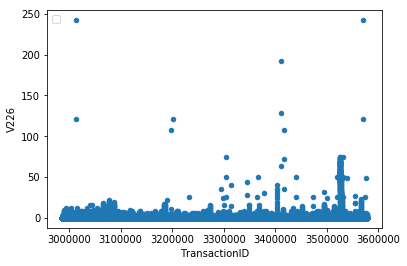

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V227:


No handles with labels found to put in legend.


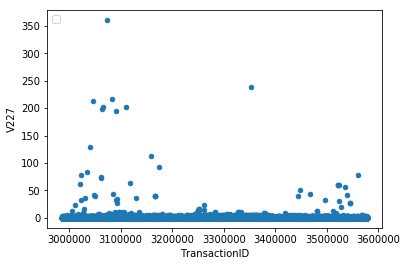

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V228:


No handles with labels found to put in legend.


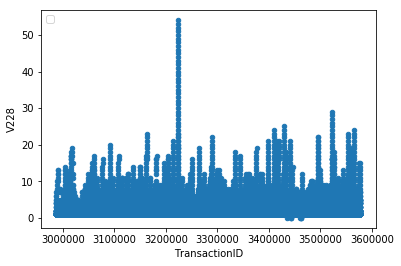

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V229:


No handles with labels found to put in legend.


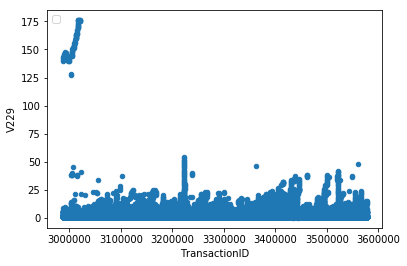

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V230:


No handles with labels found to put in legend.


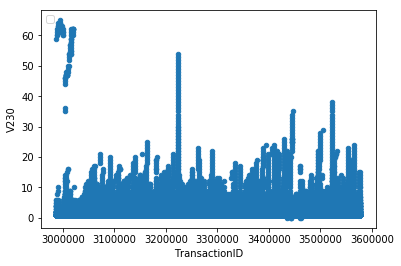

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V231:


No handles with labels found to put in legend.


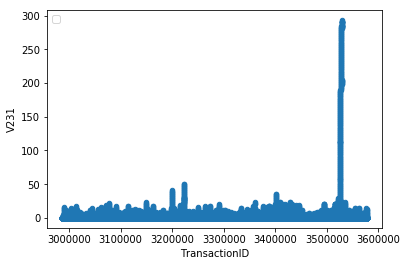

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V232:


No handles with labels found to put in legend.


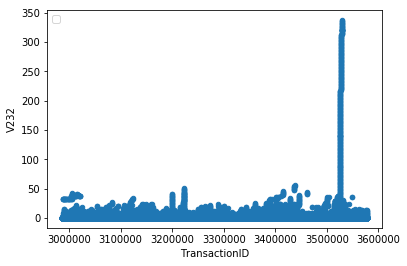

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V233:


No handles with labels found to put in legend.


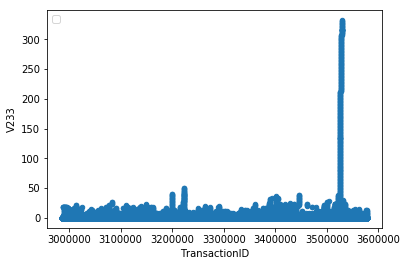

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V234:


No handles with labels found to put in legend.


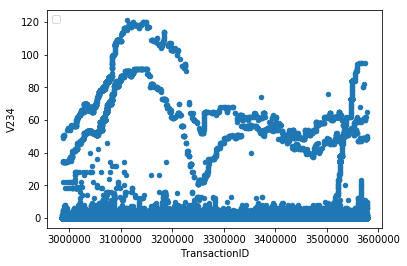

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V235:


No handles with labels found to put in legend.


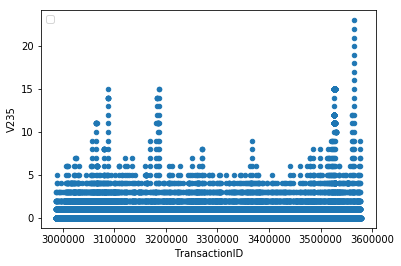

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V236:


No handles with labels found to put in legend.


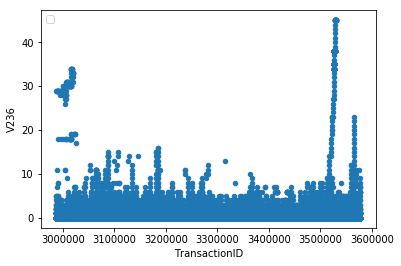

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V237:


No handles with labels found to put in legend.


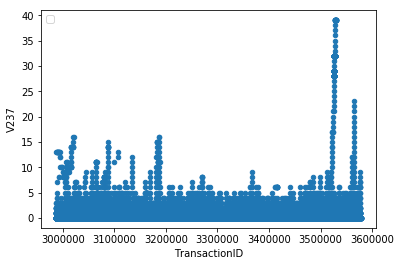

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V238:


No handles with labels found to put in legend.


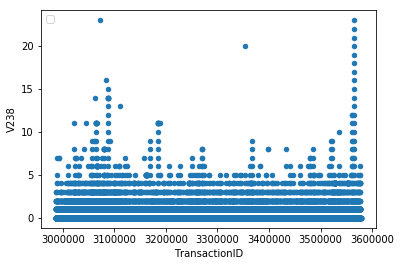

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V239:


No handles with labels found to put in legend.


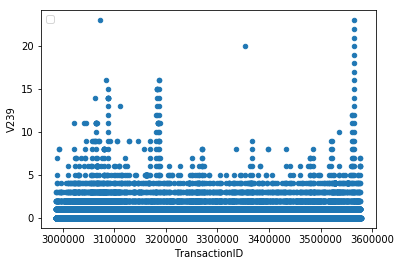

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V240:


No handles with labels found to put in legend.


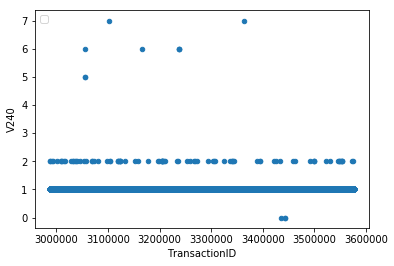

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V241:


No handles with labels found to put in legend.


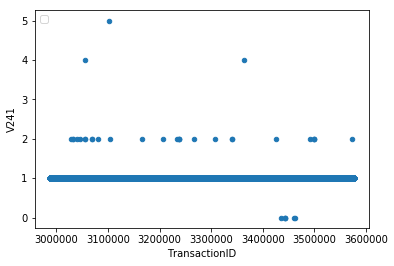

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V242:


No handles with labels found to put in legend.


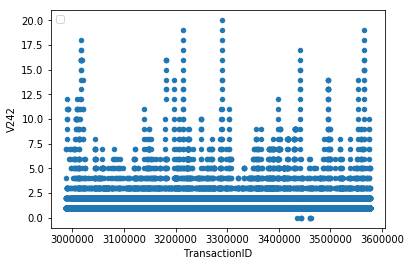

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V243:


No handles with labels found to put in legend.


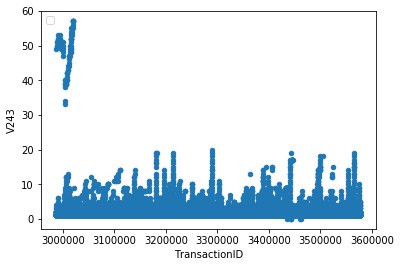

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V244:


No handles with labels found to put in legend.


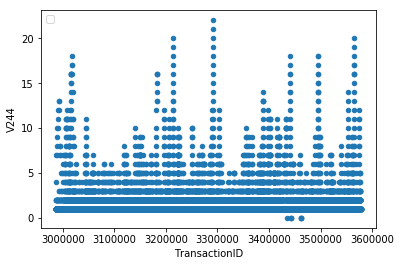

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V245:


No handles with labels found to put in legend.


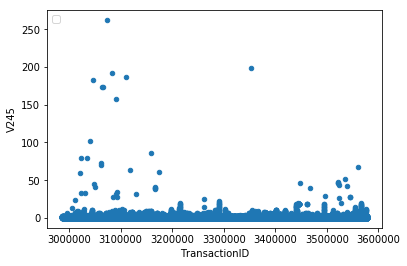

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V246:


No handles with labels found to put in legend.


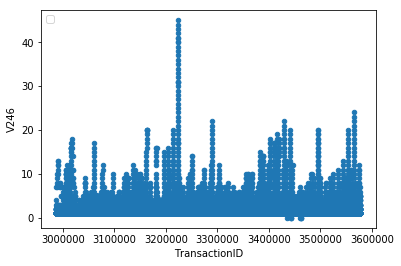

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V247:


No handles with labels found to put in legend.


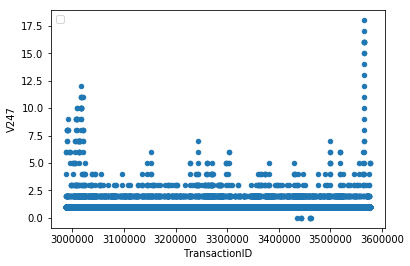

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V248:


No handles with labels found to put in legend.


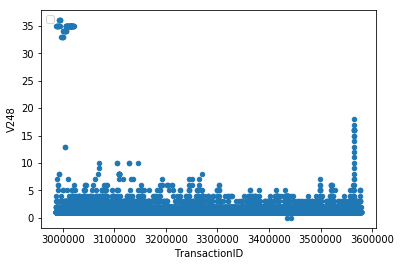

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V249:


No handles with labels found to put in legend.


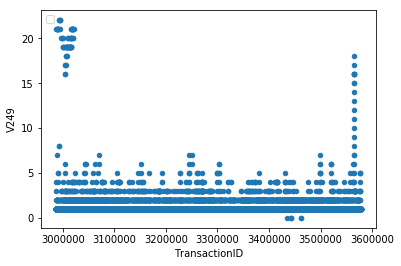

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V250:


No handles with labels found to put in legend.


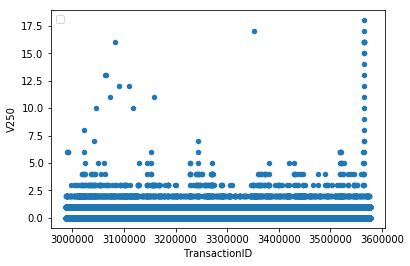

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V251:


No handles with labels found to put in legend.


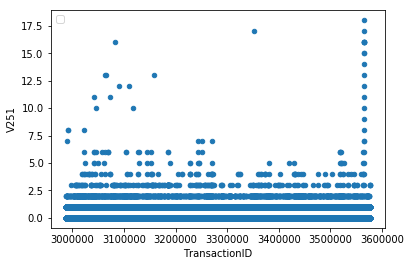

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V252:


No handles with labels found to put in legend.


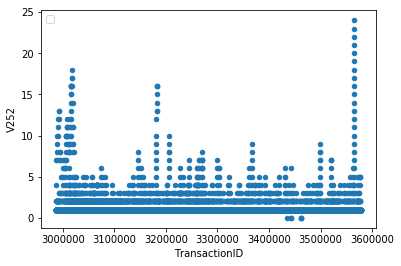

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V253:


No handles with labels found to put in legend.


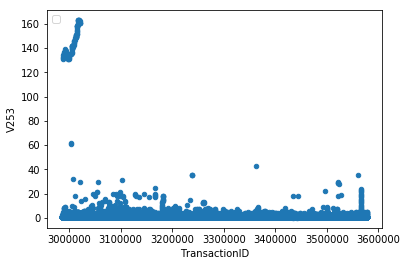

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V254:


No handles with labels found to put in legend.


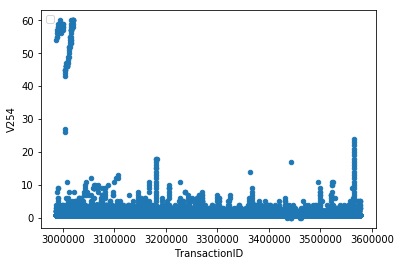

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V255:


No handles with labels found to put in legend.


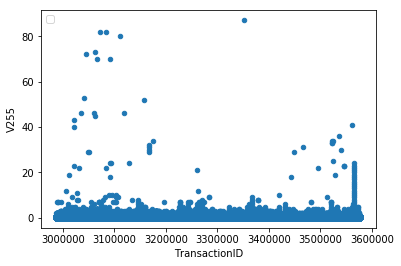

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V256:


No handles with labels found to put in legend.


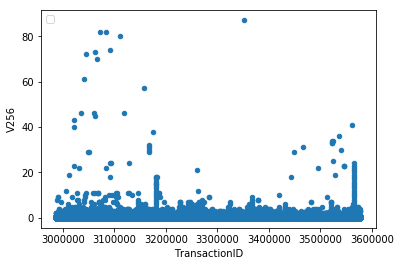

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V257:


No handles with labels found to put in legend.


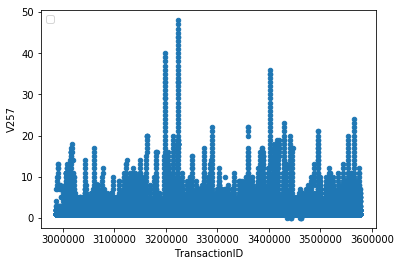

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V258:


No handles with labels found to put in legend.


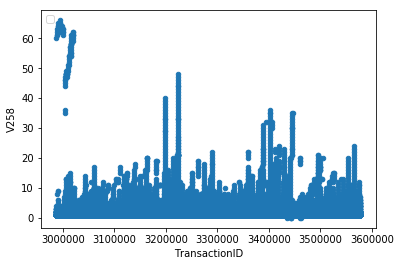

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V259:


No handles with labels found to put in legend.


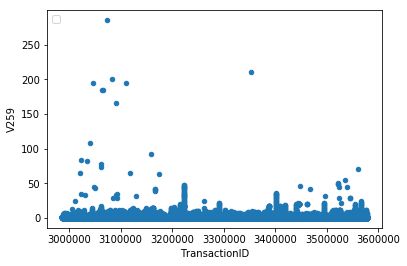

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V260:


No handles with labels found to put in legend.


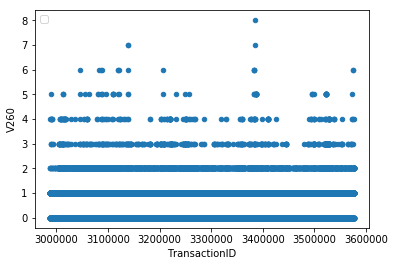

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V261:


No handles with labels found to put in legend.


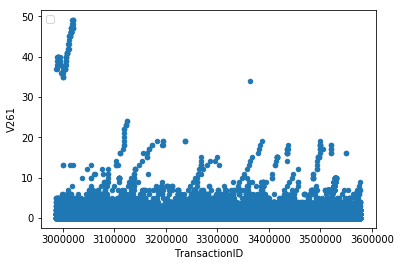

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V262:


No handles with labels found to put in legend.


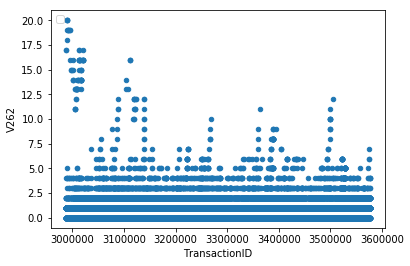

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V263:


No handles with labels found to put in legend.


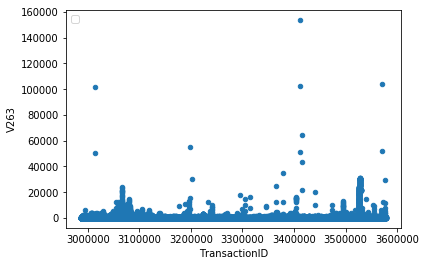

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V264:


No handles with labels found to put in legend.


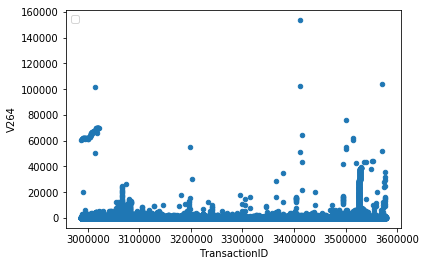

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V265:


No handles with labels found to put in legend.


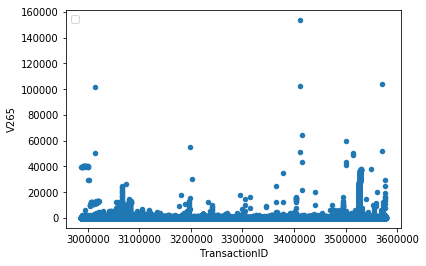

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V266:


No handles with labels found to put in legend.


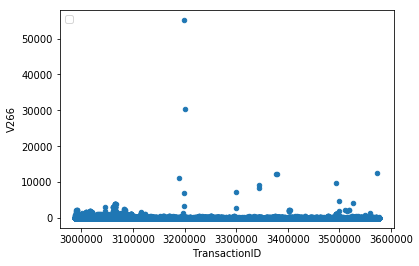

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V267:


No handles with labels found to put in legend.


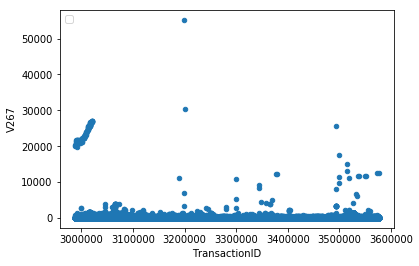

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V268:


No handles with labels found to put in legend.


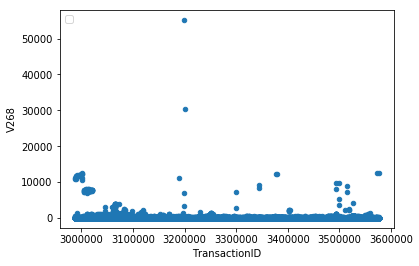

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V269:


No handles with labels found to put in legend.


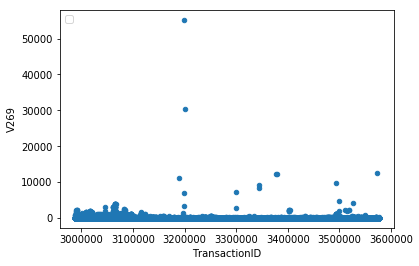

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V270:


No handles with labels found to put in legend.


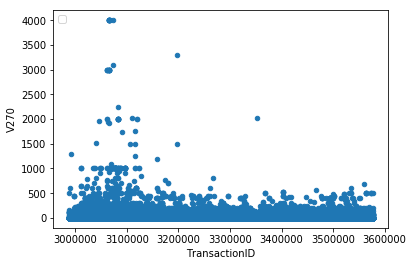

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V271:


No handles with labels found to put in legend.


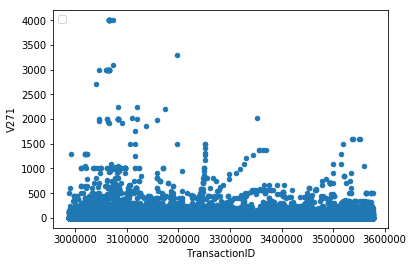

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V272:


No handles with labels found to put in legend.


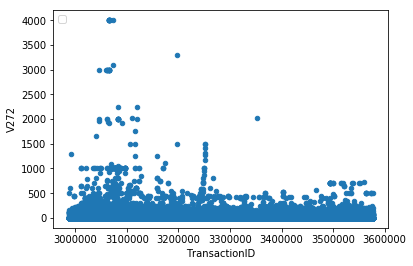

Missing data proportion is 0.7605310393876791
-------------------------------------
Column Name is V273:


No handles with labels found to put in legend.


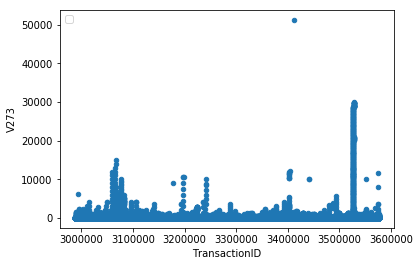

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V274:


No handles with labels found to put in legend.


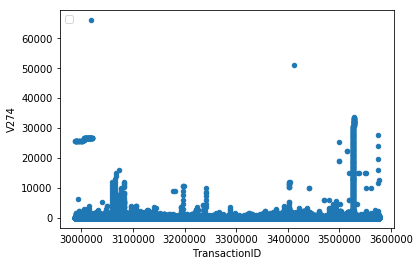

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V275:


No handles with labels found to put in legend.


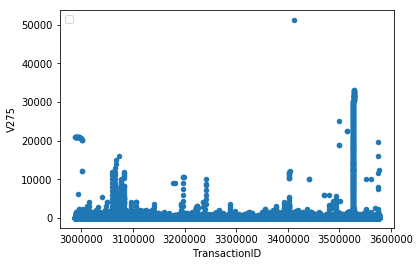

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V276:


No handles with labels found to put in legend.


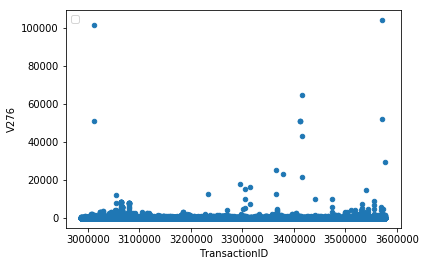

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V277:


No handles with labels found to put in legend.


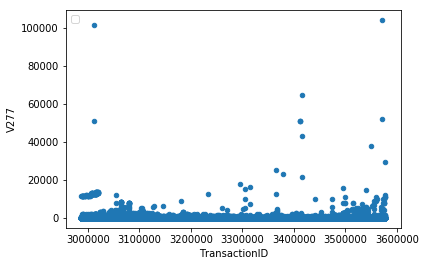

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V278:


No handles with labels found to put in legend.


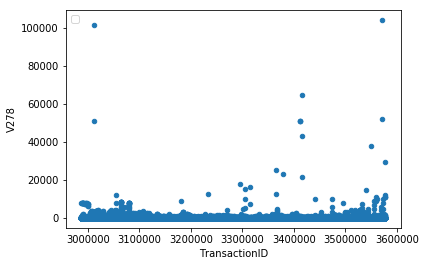

Missing data proportion is 0.7791343516103905
-------------------------------------
Column Name is V279:


No handles with labels found to put in legend.


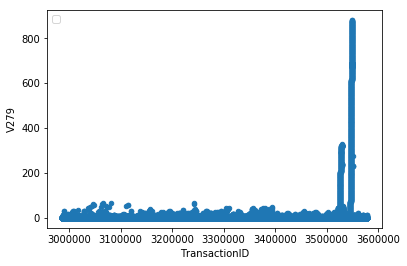

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V280:


No handles with labels found to put in legend.


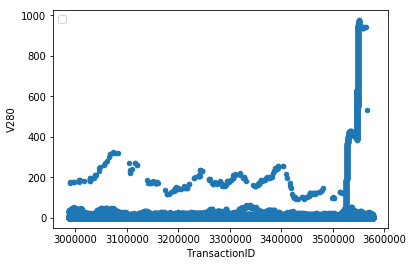

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V281:


No handles with labels found to put in legend.


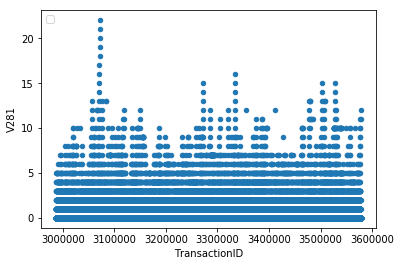

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is V282:


No handles with labels found to put in legend.


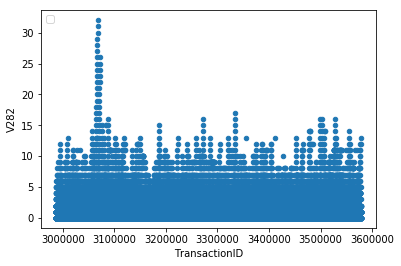

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is V283:


No handles with labels found to put in legend.


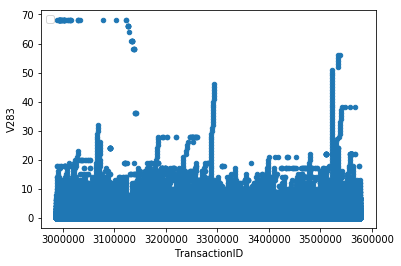

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is V284:


No handles with labels found to put in legend.


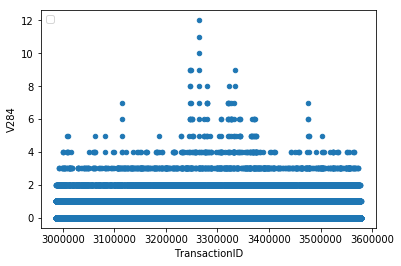

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V285:


No handles with labels found to put in legend.


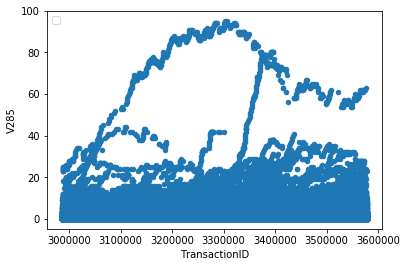

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V286:


No handles with labels found to put in legend.


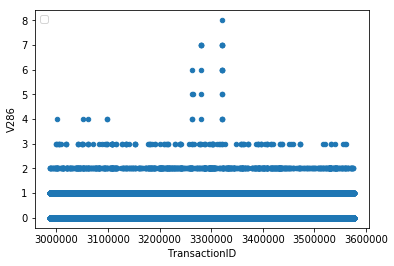

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V287:


No handles with labels found to put in legend.


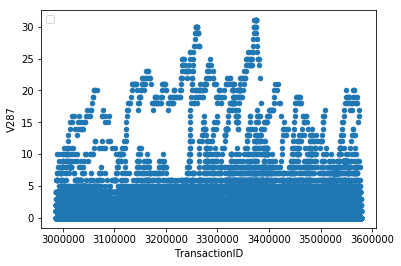

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V288:


No handles with labels found to put in legend.


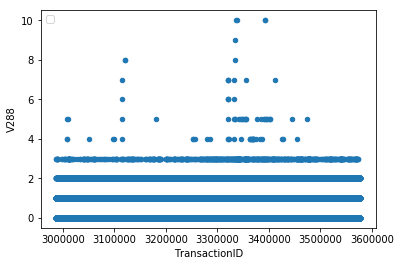

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is V289:


No handles with labels found to put in legend.


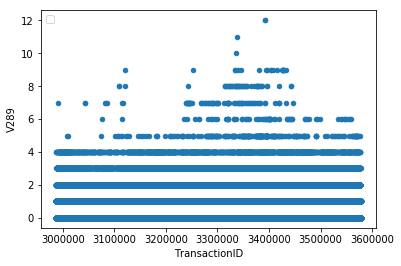

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is V290:


No handles with labels found to put in legend.


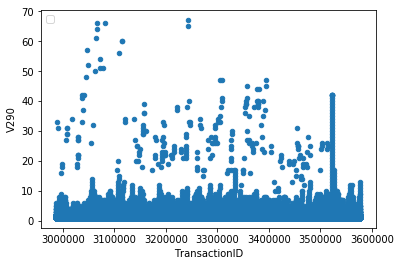

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V291:


No handles with labels found to put in legend.


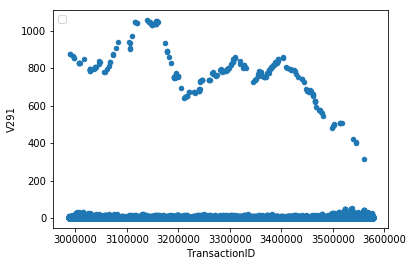

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V292:


No handles with labels found to put in legend.


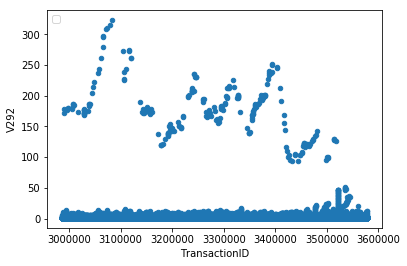

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V293:


No handles with labels found to put in legend.


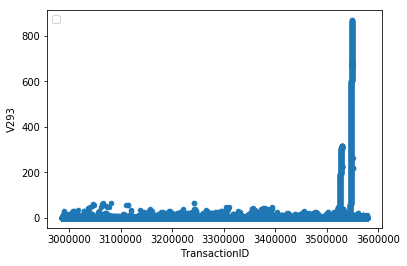

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V294:


No handles with labels found to put in legend.


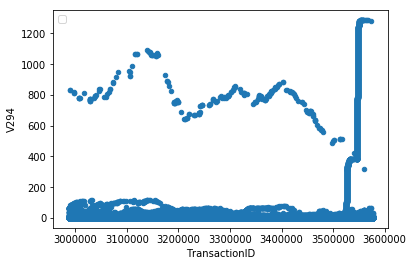

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V295:


No handles with labels found to put in legend.


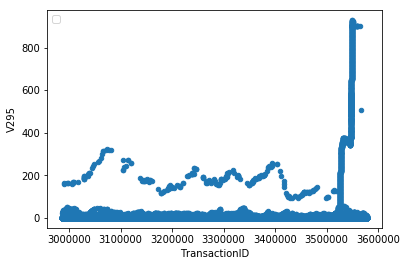

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V296:


No handles with labels found to put in legend.


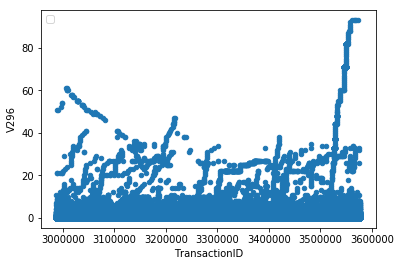

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is V297:


No handles with labels found to put in legend.


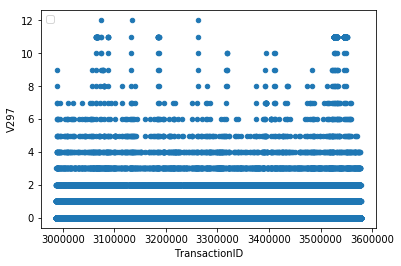

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V298:


No handles with labels found to put in legend.


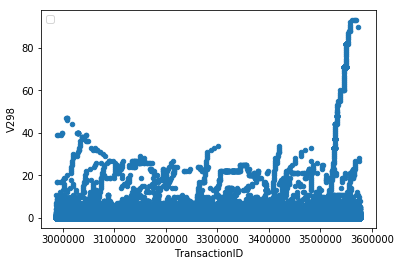

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V299:


No handles with labels found to put in legend.


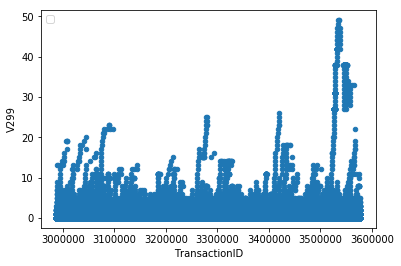

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V300:


No handles with labels found to put in legend.


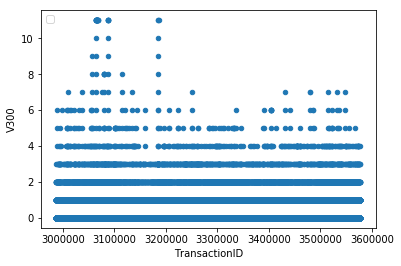

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is V301:


No handles with labels found to put in legend.


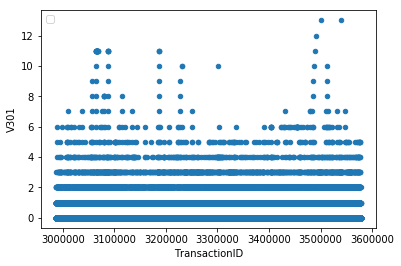

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is V302:


No handles with labels found to put in legend.


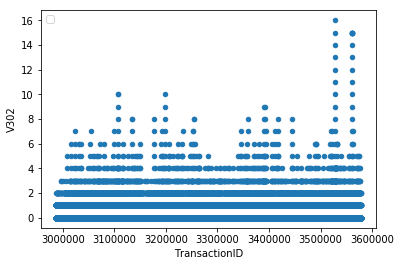

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V303:


No handles with labels found to put in legend.


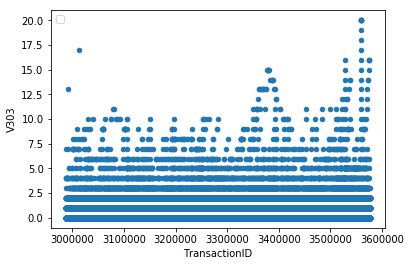

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V304:


No handles with labels found to put in legend.


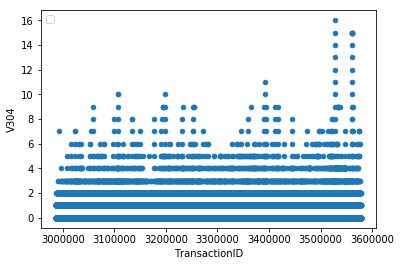

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V305:


No handles with labels found to put in legend.


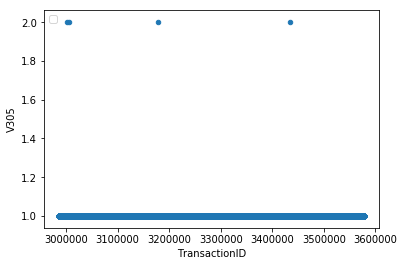

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V306:


No handles with labels found to put in legend.


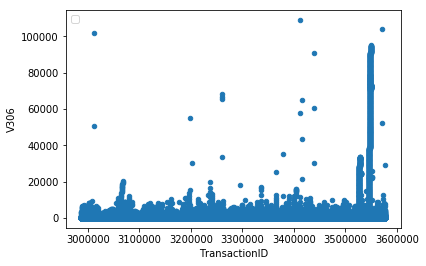

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V307:


No handles with labels found to put in legend.


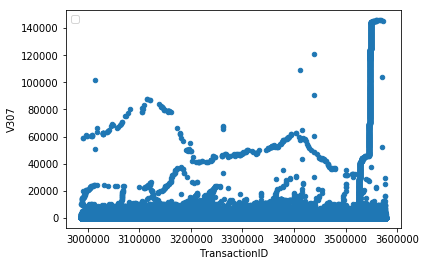

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V308:


No handles with labels found to put in legend.


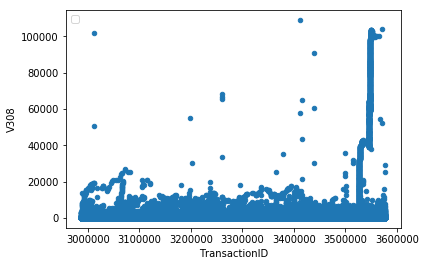

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V309:


No handles with labels found to put in legend.


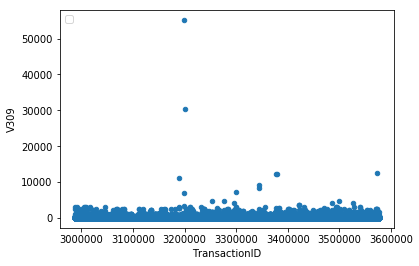

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V310:


No handles with labels found to put in legend.


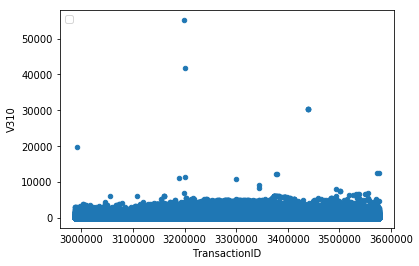

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V311:


No handles with labels found to put in legend.


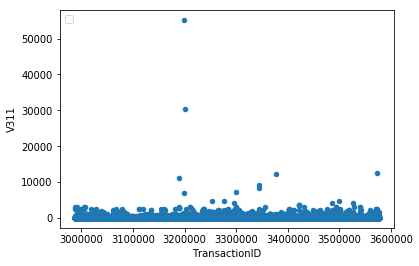

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V312:


No handles with labels found to put in legend.


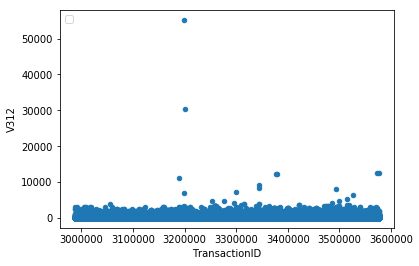

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V313:


No handles with labels found to put in legend.


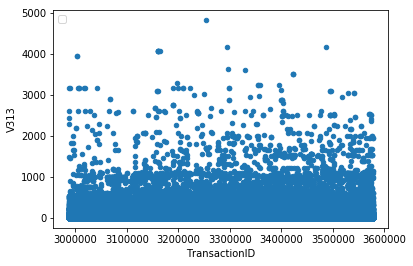

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is V314:


No handles with labels found to put in legend.


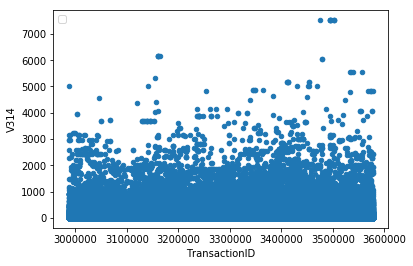

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is V315:


No handles with labels found to put in legend.


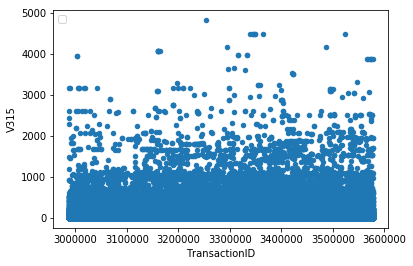

Missing data proportion is 0.0021488806854743636
-------------------------------------
Column Name is V316:


No handles with labels found to put in legend.


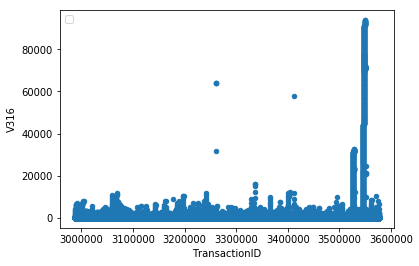

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V317:


No handles with labels found to put in legend.


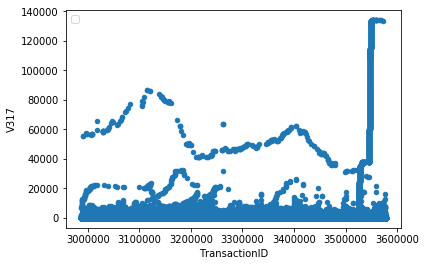

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V318:


No handles with labels found to put in legend.


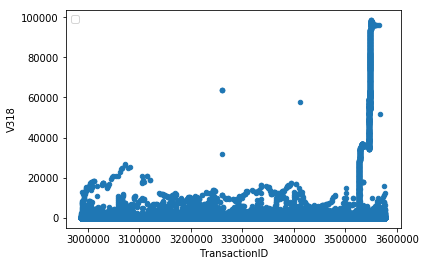

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V319:


No handles with labels found to put in legend.


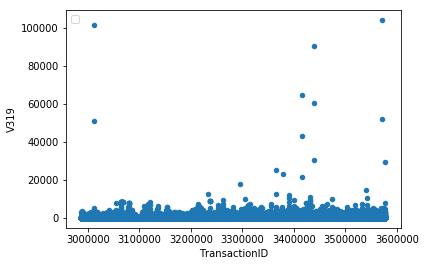

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V320:


No handles with labels found to put in legend.


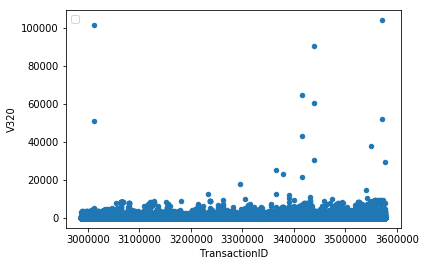

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V321:


No handles with labels found to put in legend.


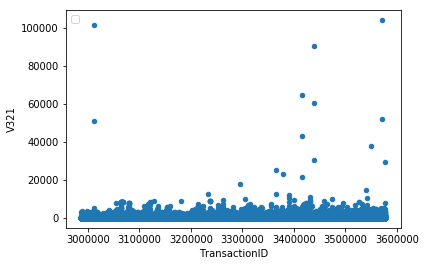

Missing data proportion is 2.032038473265274e-05
-------------------------------------
Column Name is V322:


No handles with labels found to put in legend.


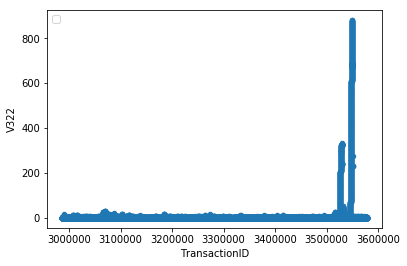

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V323:


No handles with labels found to put in legend.


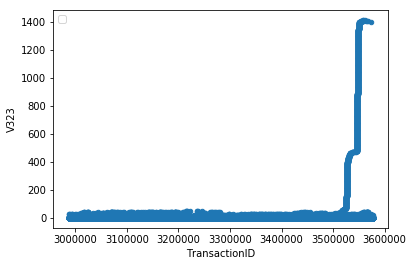

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V324:


No handles with labels found to put in legend.


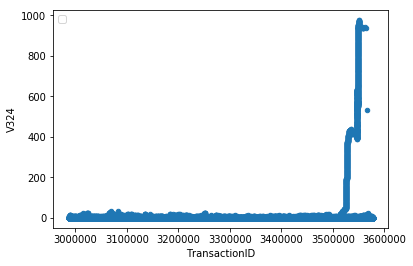

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V325:


No handles with labels found to put in legend.


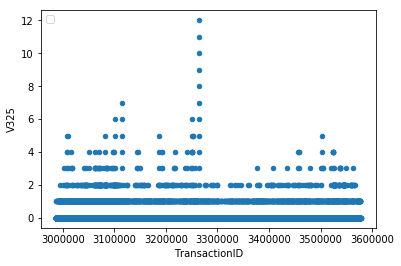

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V326:


No handles with labels found to put in legend.


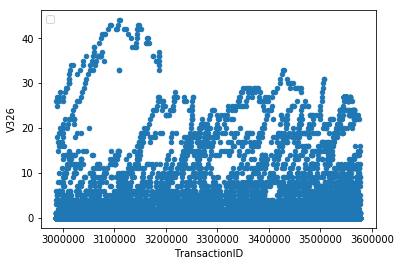

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V327:


No handles with labels found to put in legend.


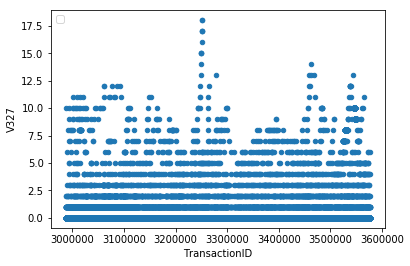

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V328:


No handles with labels found to put in legend.


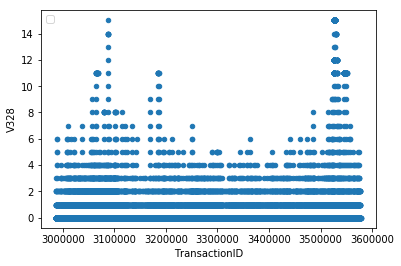

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V329:


No handles with labels found to put in legend.


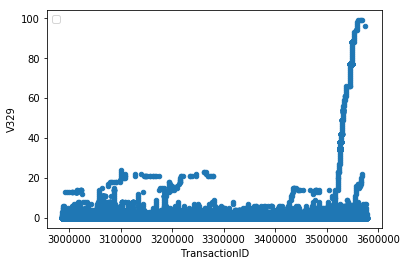

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V330:


No handles with labels found to put in legend.


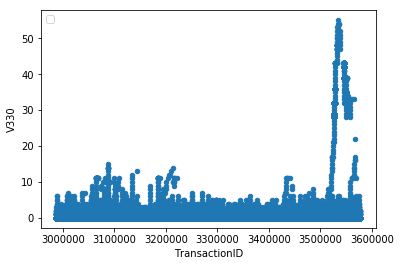

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V331:


No handles with labels found to put in legend.


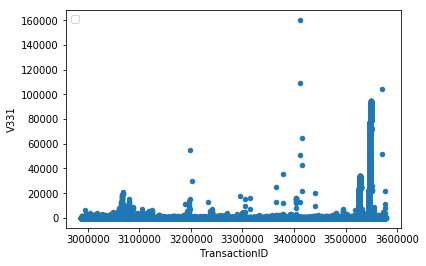

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V332:


No handles with labels found to put in legend.


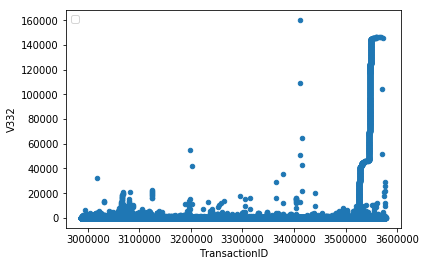

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V333:


No handles with labels found to put in legend.


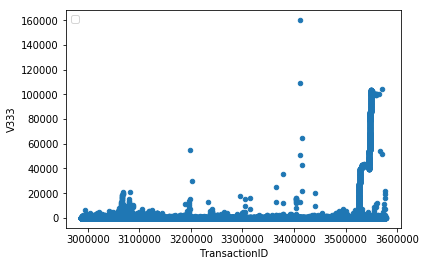

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V334:


No handles with labels found to put in legend.


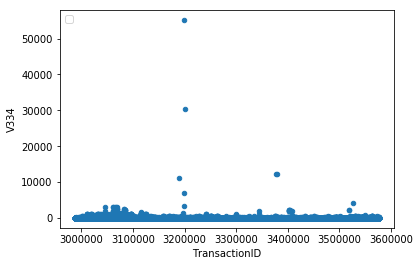

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V335:


No handles with labels found to put in legend.


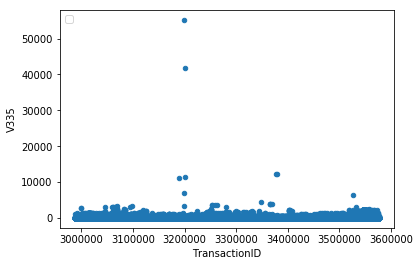

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V336:


No handles with labels found to put in legend.


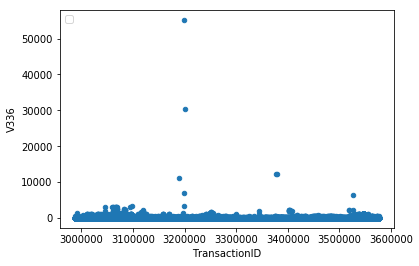

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V337:


No handles with labels found to put in legend.


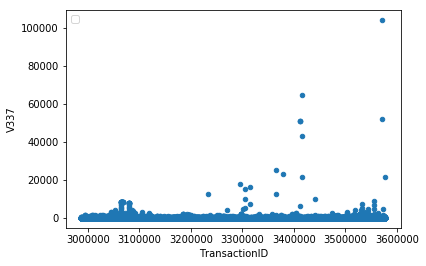

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V338:


No handles with labels found to put in legend.


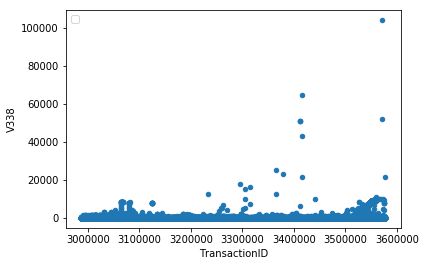

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is V339:


No handles with labels found to put in legend.


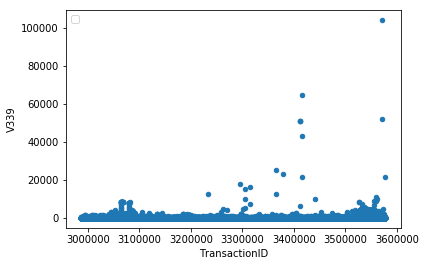

Missing data proportion is 0.8605496664070174
-------------------------------------
Column Name is id_01:


No handles with labels found to put in legend.


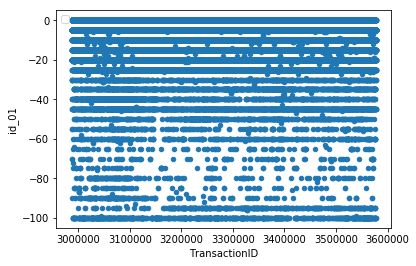

Missing data proportion is 0.7557608290716971
-------------------------------------
Column Name is id_02:


No handles with labels found to put in legend.


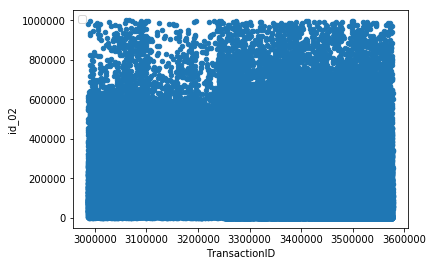

Missing data proportion is 0.7614522301622244
-------------------------------------
Column Name is id_03:


No handles with labels found to put in legend.


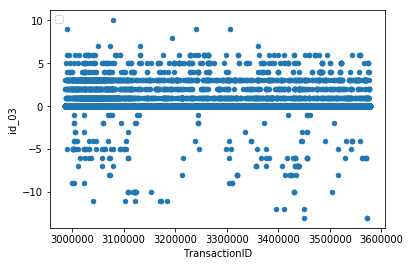

Missing data proportion is 0.8876892335828225
-------------------------------------
Column Name is id_04:


No handles with labels found to put in legend.


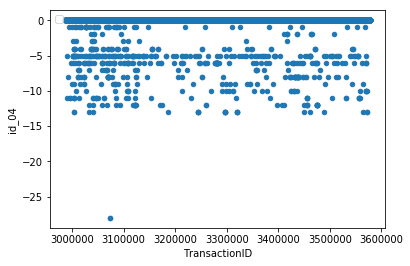

Missing data proportion is 0.8876892335828225
-------------------------------------
Column Name is id_05:


No handles with labels found to put in legend.


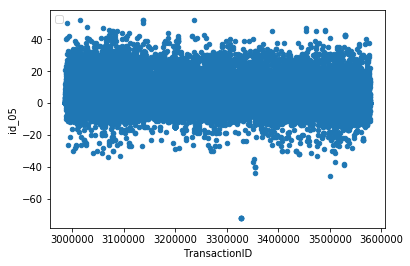

Missing data proportion is 0.7682375452975243
-------------------------------------
Column Name is id_06:


No handles with labels found to put in legend.


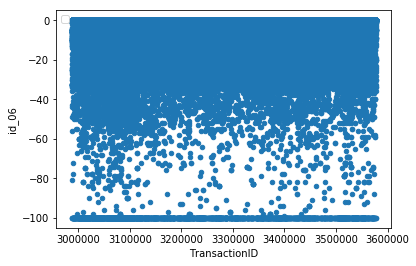

Missing data proportion is 0.7682375452975243
-------------------------------------
Column Name is id_07:


No handles with labels found to put in legend.


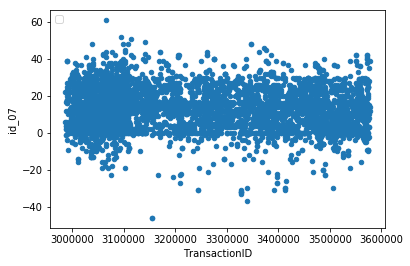

Missing data proportion is 0.9912707013919464
-------------------------------------
Column Name is id_08:


No handles with labels found to put in legend.


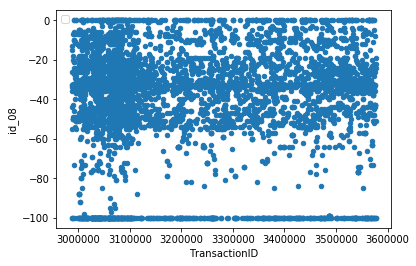

Missing data proportion is 0.9912707013919464
-------------------------------------
Column Name is id_09:


No handles with labels found to put in legend.


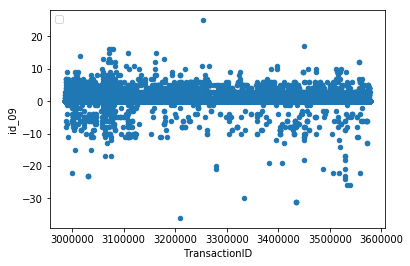

Missing data proportion is 0.8731229044603245
-------------------------------------
Column Name is id_10:


No handles with labels found to put in legend.


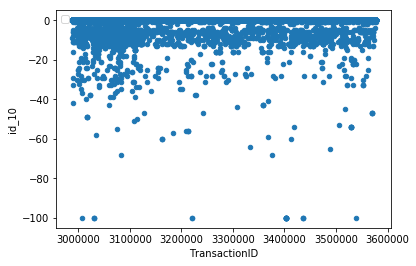

Missing data proportion is 0.8731229044603245
-------------------------------------
Column Name is id_11:


No handles with labels found to put in legend.


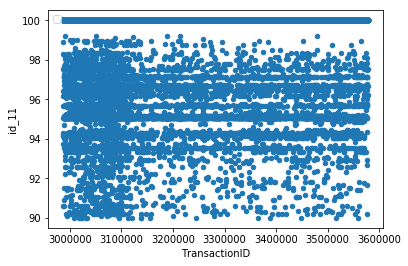

Missing data proportion is 0.7612727334304197
-------------------------------------
Column Name is id_12:
['NotFound' 'Found']
[123025, 21208]


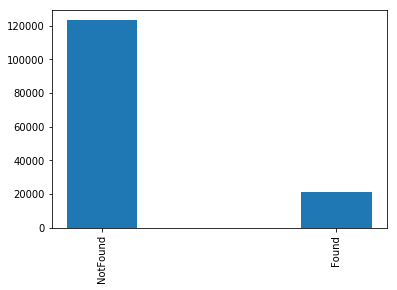

Missing data proportion is 0.7557608290716971
-------------------------------------
Column Name is id_13:


No handles with labels found to put in legend.


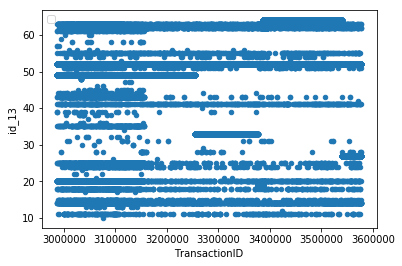

Missing data proportion is 0.7844007179869272
-------------------------------------
Column Name is id_14:


No handles with labels found to put in legend.


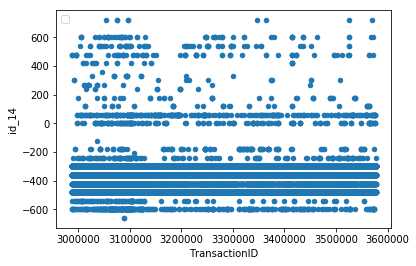

Missing data proportion is 0.8644562603718631
-------------------------------------
Column Name is id_15:
['New' 'Found' 'Unknown']
[61612, 67728, 11645]


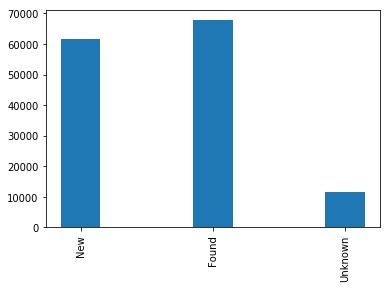

Missing data proportion is 0.7612608798726589
-------------------------------------
Column Name is id_16:
['NotFound' 'Found']
[63016, 66324]


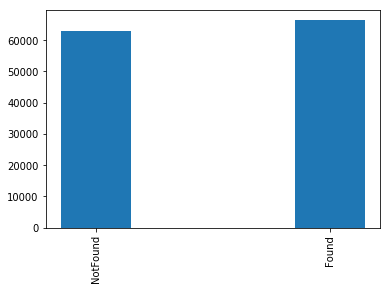

Missing data proportion is 0.7809801198902699
-------------------------------------
Column Name is id_17:


No handles with labels found to put in legend.


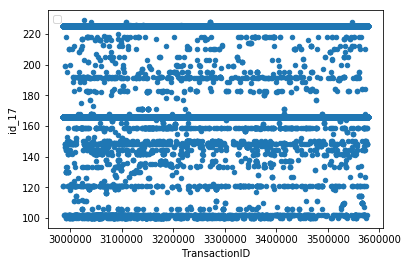

Missing data proportion is 0.7639973583499847
-------------------------------------
Column Name is id_18:


No handles with labels found to put in legend.


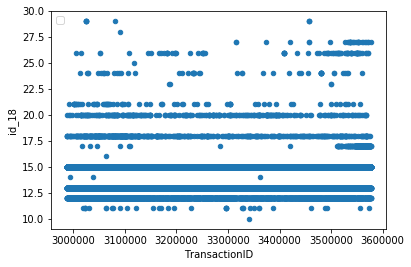

Missing data proportion is 0.9236072069631185
-------------------------------------
Column Name is id_19:


No handles with labels found to put in legend.


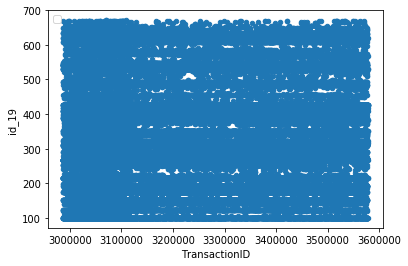

Missing data proportion is 0.7640837199850984
-------------------------------------
Column Name is id_20:


No handles with labels found to put in legend.


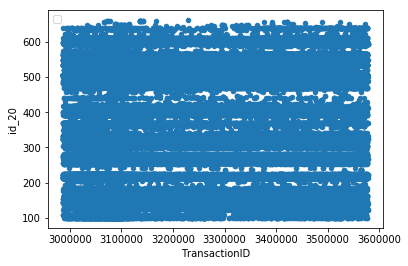

Missing data proportion is 0.7641802418125783
-------------------------------------
Column Name is id_21:


No handles with labels found to put in legend.


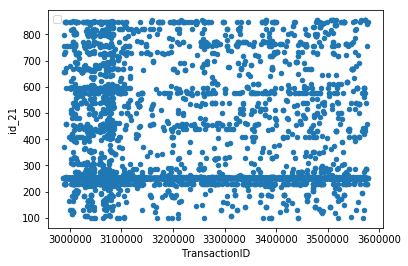

Missing data proportion is 0.9912639279303688
-------------------------------------
Column Name is id_22:


No handles with labels found to put in legend.


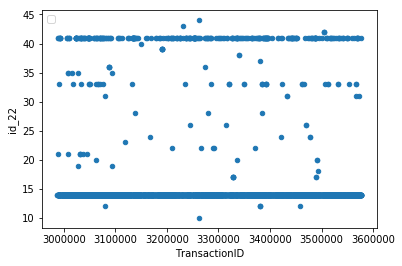

Missing data proportion is 0.9912469942764249
-------------------------------------
Column Name is id_23:
['IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']
[3489, 1071, 609]


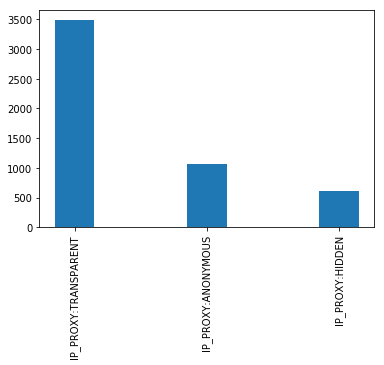

Missing data proportion is 0.9912469942764249
-------------------------------------
Column Name is id_24:


No handles with labels found to put in legend.


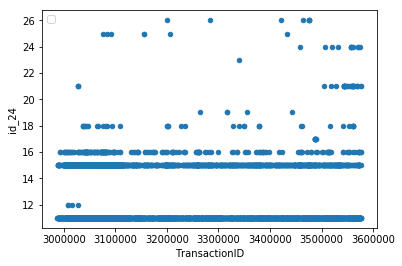

Missing data proportion is 0.9919615944728554
-------------------------------------
Column Name is id_25:


No handles with labels found to put in legend.


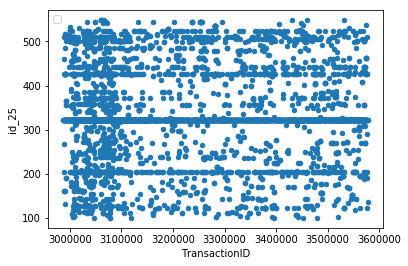

Missing data proportion is 0.9913096487960172
-------------------------------------
Column Name is id_26:


No handles with labels found to put in legend.


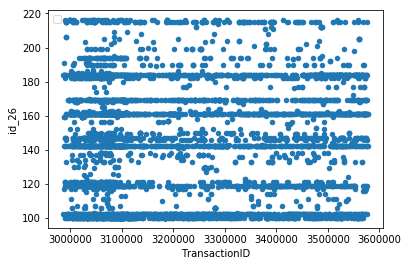

Missing data proportion is 0.9912571544687913
-------------------------------------
Column Name is id_27:
['Found' 'NotFound']
[5155, 14]


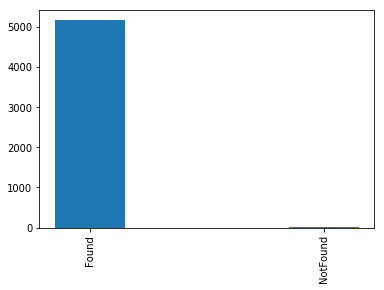

Missing data proportion is 0.9912469942764249
-------------------------------------
Column Name is id_28:
['New' 'Found']
[64746, 76232]


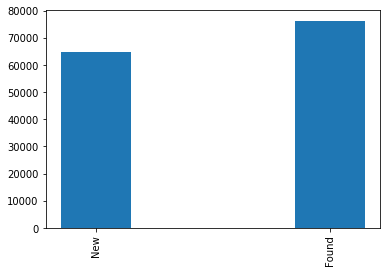

Missing data proportion is 0.7612727334304197
-------------------------------------
Column Name is id_29:
['NotFound' 'Found']
[66052, 74926]


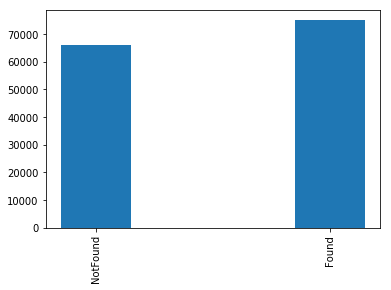

Missing data proportion is 0.7612727334304197
-------------------------------------
Column Name is id_30:
['Android 7.0' 'iOS 11.1.2' 'Mac OS X 10_11_6' 'Windows 10' 'Android'
 'Linux' 'iOS 11.0.3' 'Mac OS X 10_7_5' 'Mac OS X 10_12_6'
 'Mac OS X 10_13_1' 'iOS 11.1.0' 'Mac OS X 10_9_5' 'Windows 7'
 'Windows 8.1' 'Mac' 'iOS 10.3.3' 'Mac OS X 10.12' 'Mac OS X 10_10_5'
 'Mac OS X 10_11_5' 'iOS 9.3.5' 'Android 5.1.1' 'Android 7.1.1'
 'Android 6.0' 'iOS 10.3.1' 'Mac OS X 10.9' 'iOS 11.1.1' 'Windows Vista'
 'iOS 10.3.2' 'iOS 11.0.2' 'Mac OS X 10.11' 'Android 8.0.0' 'iOS 10.2.0'
 'iOS 10.2.1' 'iOS 11.0.0' 'Mac OS X 10.10' 'Mac OS X 10_12_3'
 'Mac OS X 10_12' 'Android 6.0.1' 'iOS' 'Mac OS X 10.13'
 'Mac OS X 10_12_5' 'Mac OS X 10_8_5' 'iOS 11.0.1' 'iOS 10.0.2'
 'Android 5.0.2' 'Windows XP' 'iOS 11.2.0' 'Mac OS X 10.6' 'Windows 8'
 'Mac OS X 10_6_8' 'Mac OS X 10_11_4' 'Mac OS X 10_12_1' 'iOS 10.1.1'
 'Mac OS X 10_11_3' 'Mac OS X 10_12_4' 'Mac OS X 10_13_2' 'Android 4.4.2'
 'Mac OS X 10_12_2' 'An

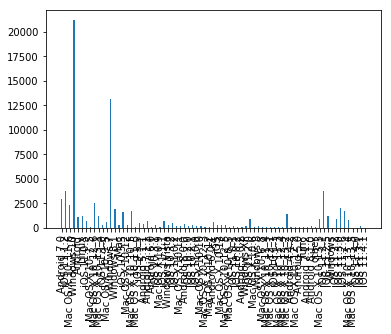

Missing data proportion is 0.868654113184543
-------------------------------------
Column Name is id_31:
['samsung browser 6.2' 'mobile safari 11.0' 'chrome 62.0'
 'chrome 62.0 for android' 'edge 15.0' 'mobile safari generic'
 'chrome 49.0' 'chrome 61.0' 'edge 16.0' 'safari generic' 'edge 14.0'
 'chrome 56.0 for android' 'firefox 57.0' 'chrome 54.0 for android'
 'mobile safari uiwebview' 'chrome' 'chrome 62.0 for ios' 'firefox'
 'chrome 60.0 for android' 'mobile safari 10.0' 'chrome 61.0 for android'
 'ie 11.0 for desktop' 'ie 11.0 for tablet' 'mobile safari 9.0'
 'chrome generic' 'other' 'chrome 59.0 for android' 'firefox 56.0'
 'android webview 4.0' 'chrome 55.0' 'opera 49.0' 'ie'
 'chrome 55.0 for android' 'firefox 52.0' 'chrome 57.0 for android'
 'chrome 56.0' 'chrome 46.0 for android' 'chrome 58.0' 'firefox 48.0'
 'chrome 59.0' 'samsung browser 4.0' 'edge 13.0' 'chrome 53.0 for android'
 'chrome 58.0 for android' 'chrome 60.0' 'mobile safari 8.0'
 'firefox generic' 'Generic/Androi

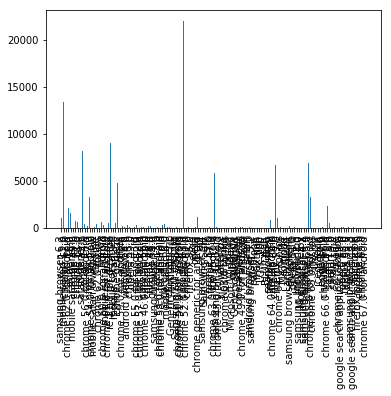

Missing data proportion is 0.7624513157449114
-------------------------------------
Column Name is id_32:


No handles with labels found to put in legend.


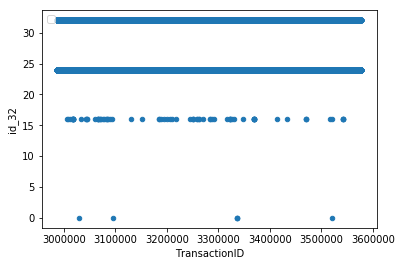

Missing data proportion is 0.8686185525112609
-------------------------------------
Column Name is id_33:
['2220x1080' '1334x750' '1280x800' '1366x768' '1920x1080' '1680x1050'
 '1136x640' '5120x2880' '2880x1800' '1920x1200' '2560x1600' '2048x1536'
 '1024x768' '1280x720' '2560x1440' '2208x1242' '2001x1125' '1440x900'
 '1600x900' '2672x1440' '1280x1024' '960x540' '2732x2048' '2436x1125'
 '2048x1152' '2960x1440' '1024x600' '855x480' '4096x2304' '2160x1440'
 '2562x1442' '801x480' '2736x1824' '3441x1440' '2880x1620' '3840x2160'
 '1638x922' '1280x768' '1360x768' '1280x960' '3440x1440' '1152x720'
 '1280x1025' '3360x2100' '2304x1296' '1152x864' '3200x1800' '2112x1188'
 '2224x1668' '2400x1350' '2000x1125' '1600x1000' '2560x1080' '1728x972'
 '3000x2000' '1024x640' '3840x2400' '2304x1440' '1280x600' '1400x1050'
 '1600x1200' '3201x1800' '1356x900' '1344x756' '1624x1080' '1536x864'
 '1800x1125' '1920x1281' '2961x1442' '1366x1024' '1344x840' '3360x1890'
 '1536x1152' '1200x675' '1480x720' '2400x1600'

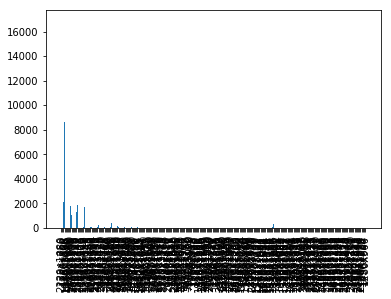

Missing data proportion is 0.8758949436109323
-------------------------------------
Column Name is id_34:
['match_status:2' 'match_status:1' 'match_status:0' 'match_status:-1']
[60011, 17376, 415, 3]


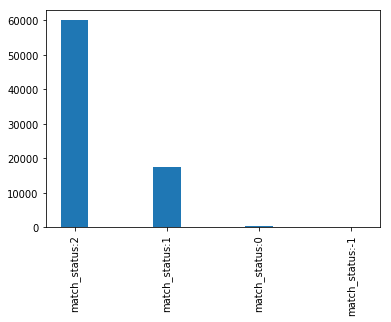

Missing data proportion is 0.8682477054898906
-------------------------------------
Column Name is id_35:
['T' 'F']
[77814, 63171]


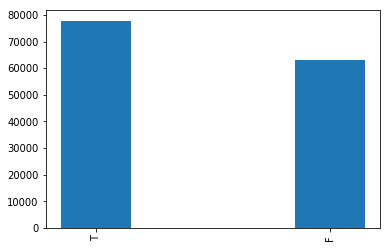

Missing data proportion is 0.7612608798726589
-------------------------------------
Column Name is id_36:
['F' 'T']
[134066, 6919]


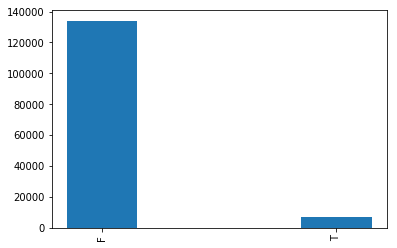

Missing data proportion is 0.7612608798726589
-------------------------------------
Column Name is id_37:
['T' 'F']
[110452, 30533]


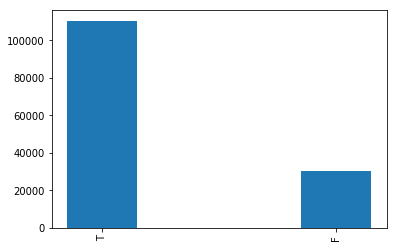

Missing data proportion is 0.7612608798726589
-------------------------------------
Column Name is id_38:
['T' 'F']
[67063, 73922]


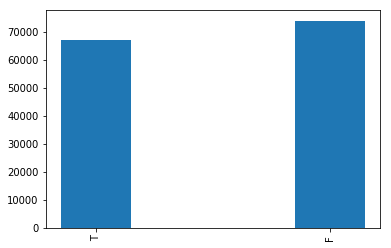

Missing data proportion is 0.7612608798726589
-------------------------------------
Column Name is DeviceType:
['mobile' 'desktop']
[55645, 85165]


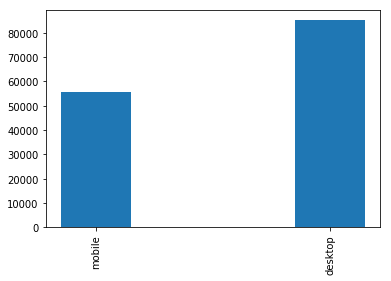

Missing data proportion is 0.7615572188166763
-------------------------------------
Column Name is DeviceInfo:
['SAMSUNG SM-G892A Build/NRD90M' 'iOS Device' 'Windows' ...
 'LDN-LX3 Build/HUAWEILDN-LX3' 'Z955A' 'LG-E975']
[9, 19782, 47722, 12573, 274, 13, 94, 1, 57, 5, 5, 6, 256, 290, 17, 92, 7, 549, 7440, 962, 21, 76, 67, 3, 6, 6, 11, 328, 461, 88, 8, 106, 1, 172, 2, 16, 65, 106, 235, 19, 21, 4, 15, 13, 50, 59, 19, 105, 4, 42, 23, 104, 1901, 23, 9, 4, 122, 8, 46, 7, 4, 28, 410, 81, 136, 19, 6, 84, 2, 50, 91, 44, 160, 3, 178, 91, 20, 6, 129, 26, 35, 27, 76, 86, 4, 5, 11, 69, 85, 334, 8, 312, 1, 28, 39, 9, 117, 105, 2, 14, 89, 32, 28, 11, 4, 13, 108, 1, 93, 6, 113, 38, 20, 16, 157, 225, 113, 182, 25, 88, 7, 35, 1, 60, 1, 6, 171, 27, 209, 150, 89, 34, 29, 20, 203, 77, 28, 9, 316, 63, 22, 25, 22, 23, 47, 11, 24, 12, 3, 63, 113, 5, 16, 219, 60, 6, 21, 98, 4, 11, 36, 1, 46, 5, 65, 16, 66, 65, 9, 5, 20, 2, 31, 8, 28, 18, 7, 25, 8, 11, 269, 5, 1, 30, 12, 23, 75, 65, 19, 16, 3, 71, 6, 35, 3, 60

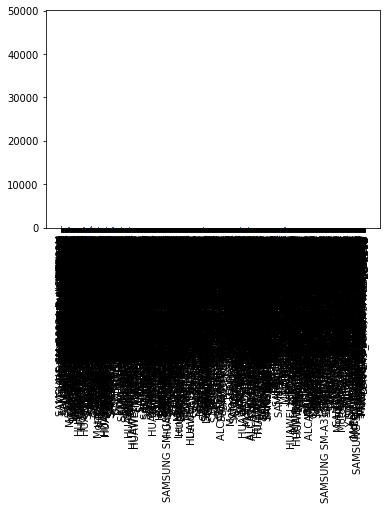

Missing data proportion is 0.7990551021099332
-------------------------------------


In [31]:
for tmp_column in df_train.columns:
    print("Column Name is {}:".format(tmp_column))
    
    tmp_count = df_train[tmp_column].count()
    
    if df_train[tmp_column].dtype != np.object:
#         df_train[tmp_column].plot(kind='line', label=tmp_column)
        df_train.plot(kind="scatter", x="TransactionID", y=tmp_column)
        plt.legend(loc='upper left')
    else:
        tmp_label = df_train[tmp_column].unique()
        tmp_ = pd.isnull(tmp_label)
        tmp_label = tmp_label[np.where(tmp_ == False)]        
        tmp_count_ = []
        
        for tmp in tmp_label:
            tmp_count_.append(df_train.loc[df_train[tmp_column] == tmp][tmp_column].count())
        
        print(tmp_label)
        print(tmp_count_)
        plt.bar(tmp_label,tmp_count_,width=0.3)
        plt.xticks(range(len(tmp_label)),tmp_label,rotation=90)

    plt.show()
    
    tmp_proportion = 1 - tmp_count / total_data_entry
    
    if tmp_proportion < delete_nan_threshold:
        usage_column.append(tmp_column)
    
    print("Missing data proportion is {}".format(1 - tmp_count / total_data_entry))
    print("-------------------------------------")

#### 1.2.1.2 proportion of nan value by row

In [33]:
len(usage_column)

202

In [46]:
delete_nan_threshold_row = 0.2

In [36]:
nan_pproportion_row = np.sum(null_df[usage_column] == True, axis=1) / total_column

In [47]:
index_row = np.where(nan_pproportion_row < delete_nan_threshold_row)

In [48]:
len(index_row[0])

522125

### 2.2 encode string data

In [0]:
le = LabelEncoder()

structure_with_charges["atom"] = le.fit_transform(structure_with_charges["atom"])
structure_with_charges.head(5)

molecule_name  atom_index  atom         x         y         z  \
0  dsgdb9nsd_000001           0     0 -0.012698  1.085804  0.008001   
1  dsgdb9nsd_000001           1     2  0.002150 -0.006031  0.001976   
2  dsgdb9nsd_000001           2     2  1.011731  1.463751  0.000277   
3  dsgdb9nsd_000001           3     2 -0.540815  1.447527 -0.876644   
4  dsgdb9nsd_000001           4     2 -0.523814  1.437933  0.906397   

   mulliken_charge  
0        -0.535689  
1         0.133921  
2         0.133922  
3         0.133923  
4         0.133923

### 2.3 normalization


In [0]:
def normalization(data_frame, feature_colnmns):
  np_list_train = data_frame[feature_columns].to_numpy()

  for index, tmp_row in enumerate(np_list_train):
    np_list_train[index] = tmp_row / np.linalg.norm(tmp_row, ord=2)
   
  return np_list_train

In [0]:
feature_columns = ["x_0", "y_0", "z_0", "x_1", "y_1", "z_1"]
tmp = normalization(training_result, feature_columns)

### 2.4 labelling

In [0]:
type_collection = train["type"].unique()

## *3. model training*

### 3.1 dataset split

In [0]:
def create_validation(partition, trainset, testset):
  return train_test_split(trainset, testset, test_size=partition)

# kfold = StratifiedKFold(n_splits=10, shuffle=True)

### 3.2 training

#### 3.2.1 model selection

##### 3.2.1.1 catboost

In [0]:
from catboost import CatBoostRegressor
learning_rate = [0.1, 0.01, 0.001]
depth = [7, 8, 9]

param_dict = dict(learning_rate=learning_rate, depth=depth)

model = CatBoostRegressor()

##### 3.2.1.2 xgboost


In [0]:
import xgboost as xgb
learning_rate = [0.1, 0.01, 0.001]
n_estimators = [150, 300, 450]
max_depth = [7, 8, 9]

param_dict = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)

model = xgb.XGBRegressor()
gbm = xgb.XGBRegressor(max_depth=3, n_estimators=300, learning_rate=0.05).fit(np_list_train, train_y)

#### 3.2.2 loss function selection

In [0]:
def self_loss(calcul_result, predict_result):
  grad = abs(predict_result - calcul_result)
  hess = np.power(np.abs(grad), 0.5)
  return grad, hess

#### 3.2.3 gridsearch

In [0]:
grid_search = GridSearchCV(model, param_dict)
grid_search.fit(np_list_train, train_y)

In [0]:
print(grid_search.best_score_)
print(grid_search.best_params_)

#### 3.2.4 training

##### 3.2.4.1 mulliken_charges model

In [0]:
structure_with_charges.head(5)

molecule_name  atom_index  atom         x         y         z  \
0  dsgdb9nsd_000001           0     0 -0.012698  1.085804  0.008001   
1  dsgdb9nsd_000001           1     2  0.002150 -0.006031  0.001976   
2  dsgdb9nsd_000001           2     2  1.011731  1.463751  0.000277   
3  dsgdb9nsd_000001           3     2 -0.540815  1.447527 -0.876644   
4  dsgdb9nsd_000001           4     2 -0.523814  1.437933  0.906397   

   mulliken_charge  
0        -0.535689  
1         0.133921  
2         0.133922  
3         0.133923  
4         0.133923

In [0]:
feature_columns = ["atom", "x", "y", "z"]
train_x = normalization(structure_with_charges, feature_columns)
train_y = structure_with_charges["mulliken_charge"]
eval_set = None

In [0]:
train_x, valid_x, train_y, valid_y = create_validation(0.2, train_x, train_y)
eval_set = (valid_x, valid_y)

In [0]:
model_mulliken_charge = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_mulliken_charge.fit(train_x, train_y, eval_set=eval_set,silent=True)

In [0]:
submission = pd.DataFrame({ 'id': tmp_submission["id"],
                            'scalar_coupling_constant': tmp_submission["sc"]})

In [0]:
submission.to_csv("submission_all_day.csv", index=False)